# Capítulo 9: Algoritmos Supervisados en Machine Learning

---

### 9.1

---

### 9.2.

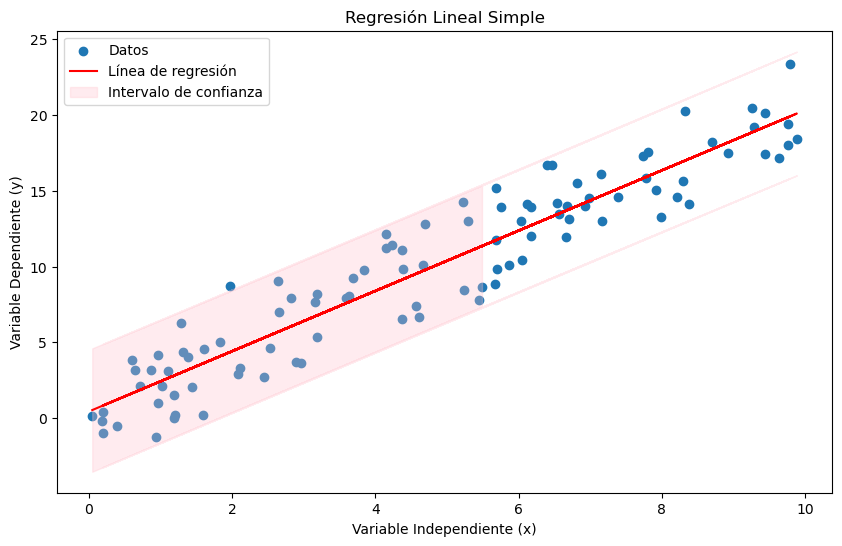

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           3.49e-49
Time:                        13:52:31   Log-Likelihood:                -210.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      98   BIC:                             430.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4443      0.387      1.149      0.2

In [1]:
# Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings

warnings.filterwarnings("ignore")

# Generando datos simulados
np.random.seed(0)
x = np.random.rand(100) * 10  # Variable independiente
y = 2 * x + np.random.randn(100) * 2  # Variable dependiente con ruido

# Ajustando un modelo de regresión lineal
X = sm.add_constant(x)  # Agregando una constante al modelo
model = sm.OLS(y, X).fit()

# Predicciones
predictions = model.predict(X)

# Obteniendo los intervalos de confianza para las predicciones
prediction_summary = model.get_prediction(X).summary_frame()
iv_l = prediction_summary["obs_ci_lower"]
iv_u = prediction_summary["obs_ci_upper"]

# Mostrando el resumen del modelo
model_summary = model.summary()

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Datos")
plt.plot(x, predictions, color="red", label="Línea de regresión")
plt.fill_between(x, iv_l, iv_u, color="pink", alpha=0.3, label="Intervalo de confianza")
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Regresión Lineal Simple")
plt.legend()
plt.show()
print(model_summary)

### 9.3.

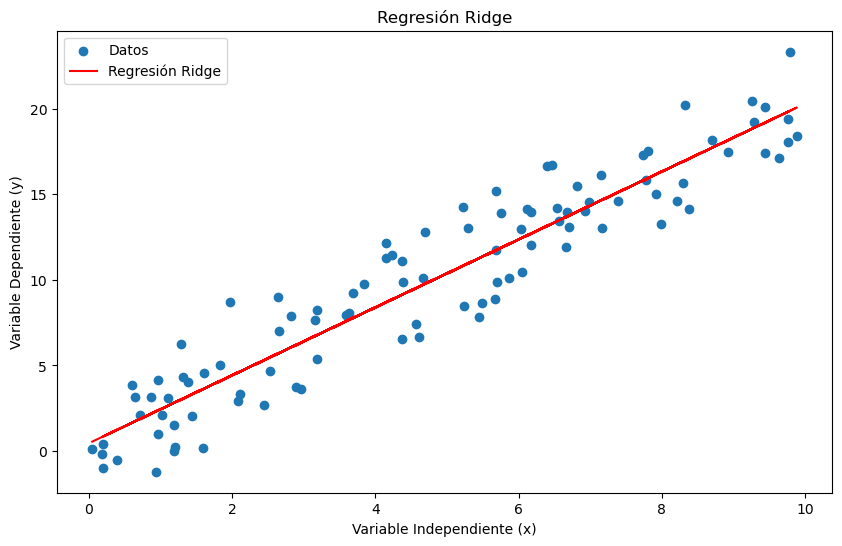

Coeficientes: [1.98499883]
Intercepto: [0.4555933]
MSE: 3.9698020001429564
R2: 0.8921215956085048
Validación Cruzada (MSE): [-3.81241357 -6.25648415 -2.47561441 -4.75524877 -3.60098798]
Validación Cruzada (MSE promedio): 4.180149777360347


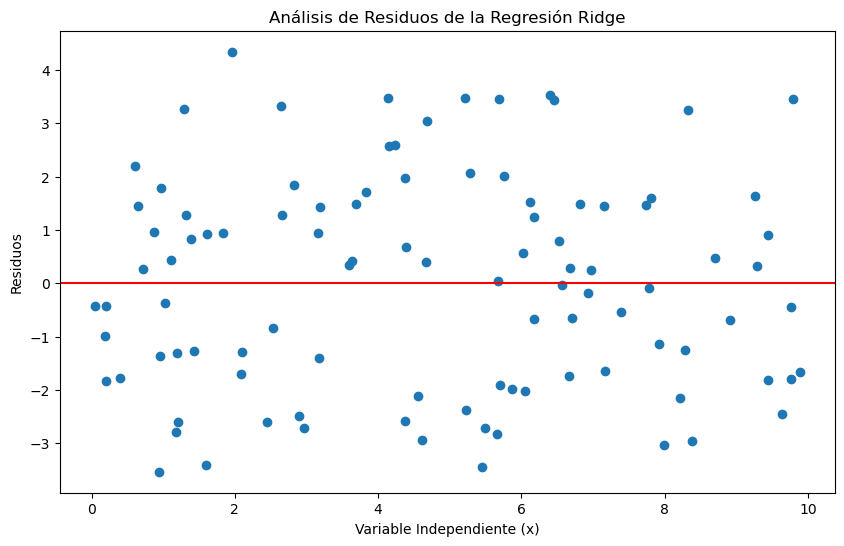

In [2]:
# Ejercicio 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Generando datos simulados
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # Varias variables independientes
y = 2 * x + np.random.randn(100, 1) * 2  # Variable dependiente con ruido

# Ajustando un modelo de regresión ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x, y)
predictions = ridge_model.predict(x)

# Aplanamos todo a vectores 1-D
x_vals     = x.ravel()           # de (100,1) a (100,)
y_vals     = y.ravel()           # de (100,1) a (100,)
preds_flat = predictions.ravel() # de (100,1) o (100,) a (100,)
residuos   = y_vals - preds_flat # ahora ambos son (100,)

# Métricas de evaluación
mse = mean_squared_error(y_vals, preds_flat)
r2  = r2_score(y_vals, preds_flat)

# Validación cruzada
cv_scores = cross_val_score(ridge_model, x, y, cv=5, scoring="neg_mean_squared_error")

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, label="Datos")
plt.plot(x_vals, preds_flat, color="red", label="Regresión Ridge")
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Regresión Ridge")
plt.legend()
plt.show()

# Imprimiendo las métricas y coeficientes del modelo
print(f"Coeficientes: {ridge_model.coef_}")
print(f"Intercepto: {ridge_model.intercept_}")
print(f"MSE: {mse}")
print(f"R2: {r2}")
print(f"Validación Cruzada (MSE): {cv_scores}")
print(f"Validación Cruzada (MSE promedio): {-np.mean(cv_scores)}")

# Análisis de residuos
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, residuos)
plt.axhline(y=0, color="red", linestyle="-")
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Residuos")
plt.title("Análisis de Residuos de la Regresión Ridge")
plt.show()

### 9.4.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     97.35
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           5.22e-29
Time:                        13:52:31   Log-Likelihood:                -202.28
No. Observations:                 100   AIC:                             412.6
Df Residuals:                      96   BIC:                             423.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4531      0.643      0.705      0.4

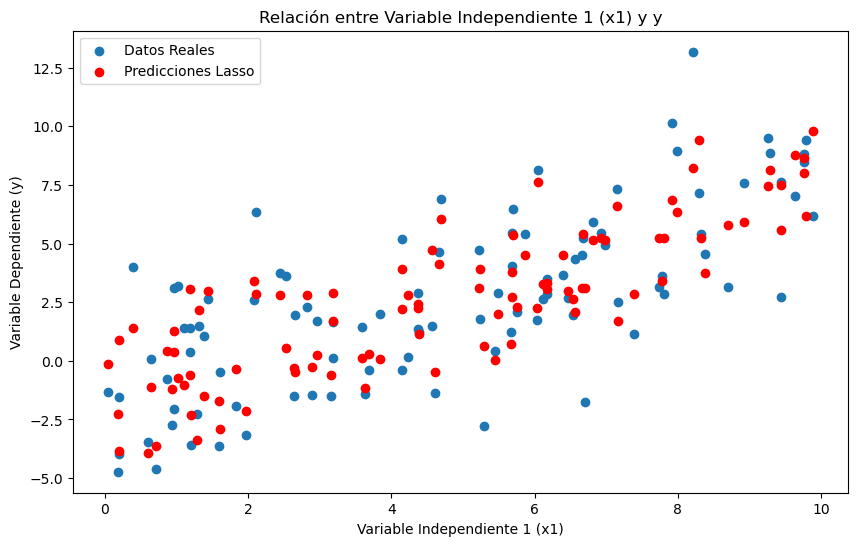

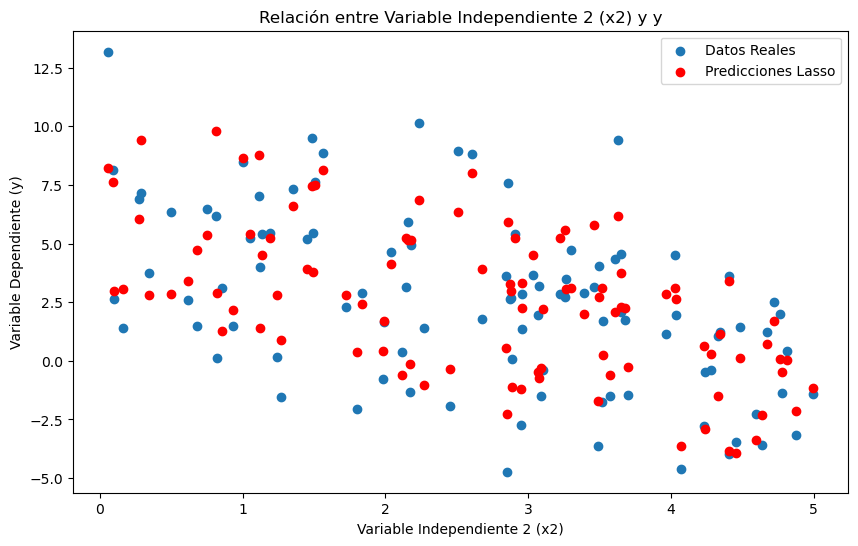

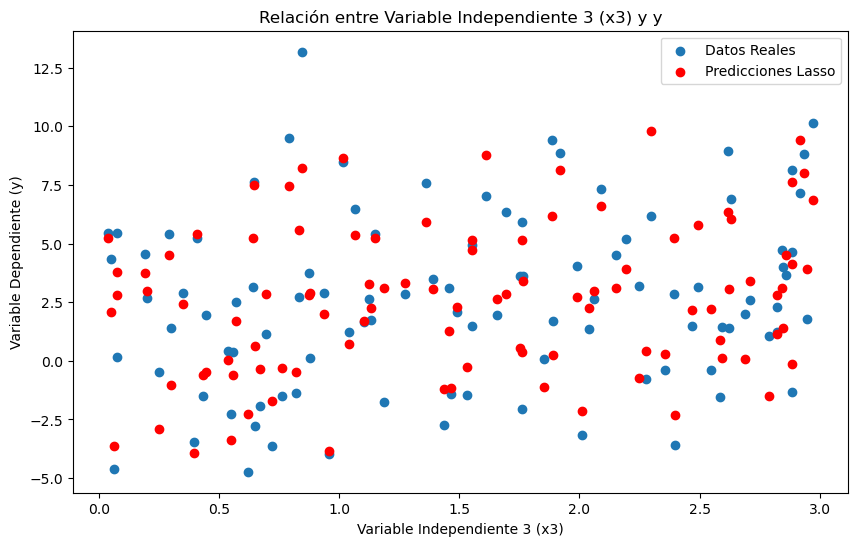

In [3]:
# Ejercicio 3
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
x3 = np.random.rand(100) * 3
y = 1 * x1 - x2 + 0.5 * x3 + np.random.randn(100) * 2

# Combinando las variables independientes en una única matriz
X = np.column_stack((x1, x2, x3))
X = sm.add_constant(X)

# Ajustando un modelo de regresión Lasso usando statsmodels
model = sm.OLS(y, X)
lasso_model = model.fit_regularized(method="elastic_net", alpha=0.1, L1_wt=1.0)

# Extraemos los parámetros estimados del modelo ajustado
params = lasso_model.params

# Reajustamos el modelo usando los parámetros del modelo regularizado
# pero sin regularización adicional para obtener estadísticas completas
refit_model = sm.OLS(y, X)
refit_results = refit_model.fit()
print(refit_results.summary())

# Predicciones
predictions = refit_results.predict(X)

# Graficando los resultados para cada variable independiente
variables = [x1, x2, x3]
titles = [
    "Variable Independiente 1 (x1)",
    "Variable Independiente 2 (x2)",
    "Variable Independiente 3 (x3)",
]
for i, (var, title) in enumerate(zip(variables, titles)):
    plt.figure(figsize=(10, 6))
    plt.scatter(var, y, label="Datos Reales")
    plt.scatter(var, predictions, color="red", label="Predicciones Lasso")
    plt.xlabel(title)
    plt.ylabel("Variable Dependiente (y)")
    plt.title(f"Relación entre {title} y y")
    plt.legend()
    plt.show()

### 9.5.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     322.6
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           5.48e-50
Time:                        13:52:32   Log-Likelihood:                -202.28
No. Observations:                 100   AIC:                             412.6
Df Residuals:                      96   BIC:                             423.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4531      0.643      0.705      0.4

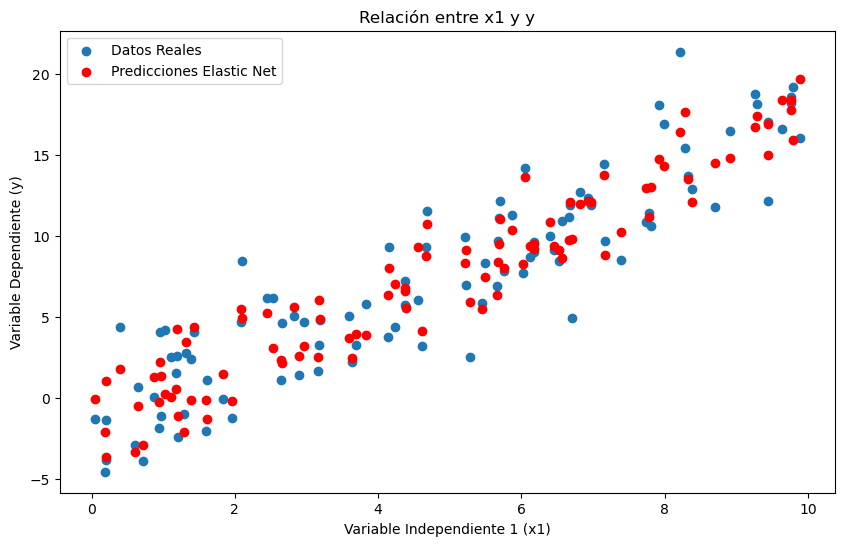

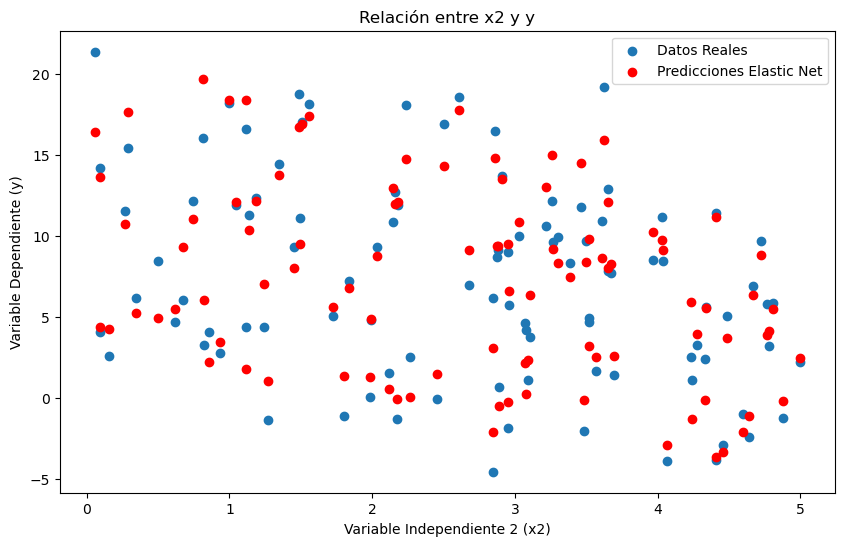

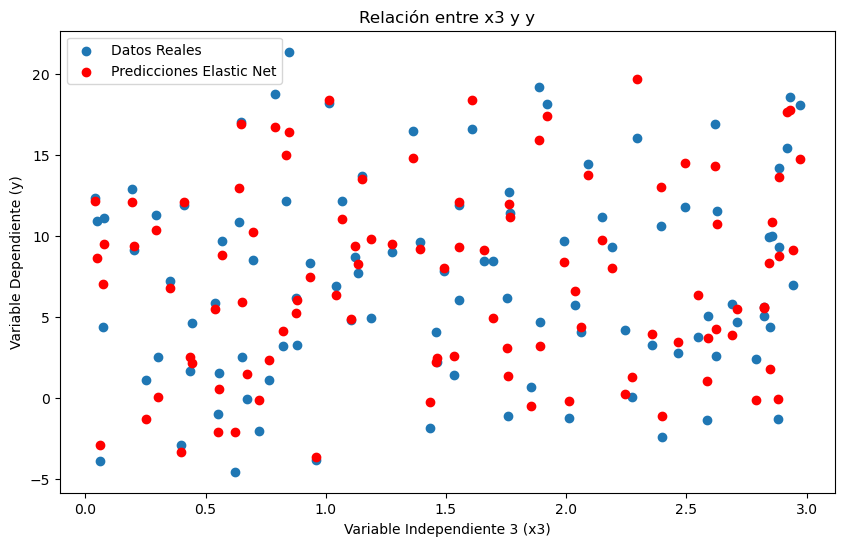

In [4]:
# Ejercicio 4
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
x3 = np.random.rand(100) * 3
y = 2 * x1 - x2 + 0.5 * x3 + np.random.randn(100) * 2

# Combinando las variables independientes en una única matriz
X = np.column_stack((x1, x2, x3))
X = sm.add_constant(X)

# Ajustando un modelo de regresión Elastic Net usando statsmodels
model = sm.OLS(y, X)
elastic_net_model = model.fit_regularized(method="elastic_net", alpha=0.1, L1_wt=0.15)

# Extraemos los parámetros estimados del modelo ajustado
params = elastic_net_model.params

# Reajustamos el modelo usando los parámetros del modelo regularizado
# pero sin regularización adicional para obtener estadísticas completas
refit_model = sm.OLS(y, X)
refit_results = refit_model.fit()
print(refit_results.summary())

# Predicciones
predictions = refit_results.predict(X)

# Graficando los resultados para la primera variable independiente
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, label="Datos Reales")
plt.scatter(x1, predictions, color="red", label="Predicciones Elastic Net")
plt.xlabel("Variable Independiente 1 (x1)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Relación entre x1 y y")
plt.legend()
plt.show()

# Graficando los resultados para la segunda variable independiente
plt.figure(figsize=(10, 6))
plt.scatter(x2, y, label="Datos Reales")
plt.scatter(x2, predictions, color="red", label="Predicciones Elastic Net")
plt.xlabel("Variable Independiente 2 (x2)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Relación entre x2 y y")
plt.legend()
plt.show()

# Graficando los resultados para la tercera variable independiente
plt.figure(figsize=(10, 6))
plt.scatter(x3, y, label="Datos Reales")
plt.scatter(x3, predictions, color="red", label="Predicciones Elastic Net")
plt.xlabel("Variable Independiente 3 (x3)")
plt.ylabel("Variable Dependiente (y)")
plt.title("Relación entre x3 y y")
plt.legend()
plt.show()

### 9.6.

Modelo de Regresión Kernel Ridge:
Alpha: 0.1
Kernel: rbf


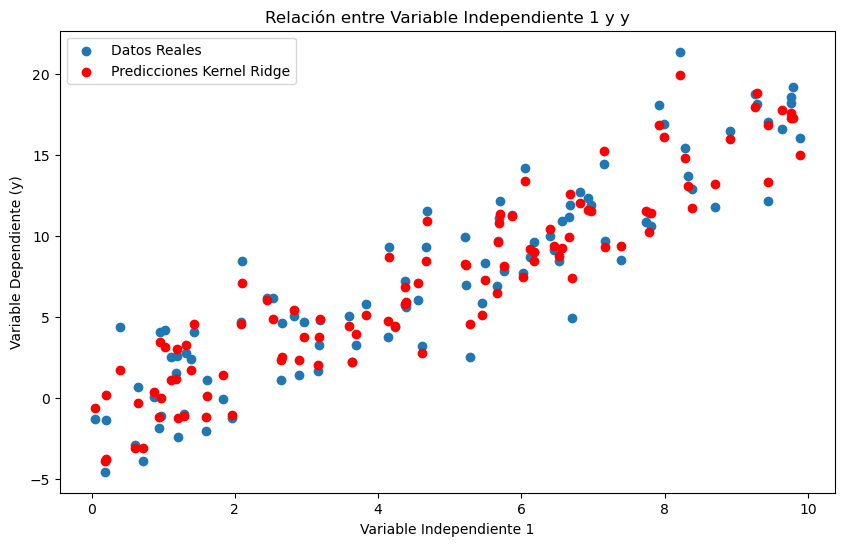

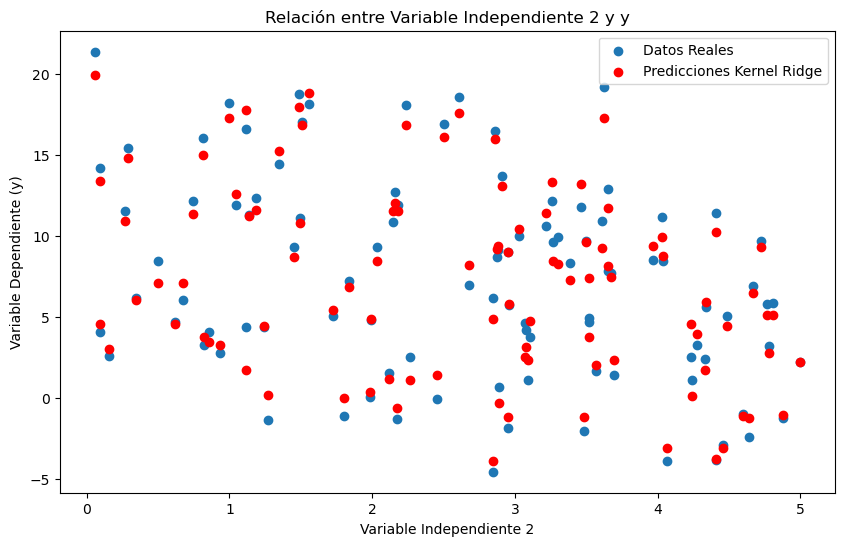

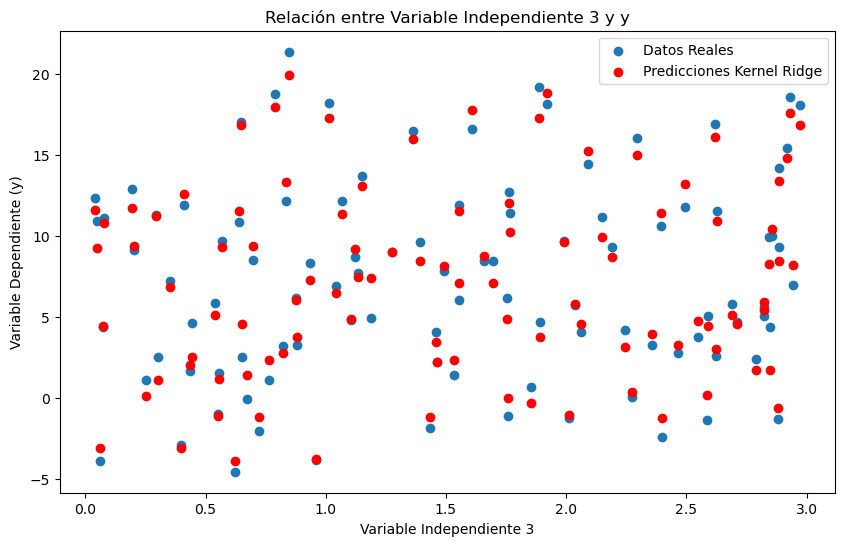

In [5]:
# Ejercicio 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100, 1) * 10
x2 = np.random.rand(100, 1) * 5
x3 = np.random.rand(100, 1) * 3
X = np.hstack((x1, x2, x3))
y = 2 * x1.flatten() - x2.flatten() + 0.5 * x3.flatten() + np.random.randn(100) * 2

# Ajustando un modelo de Regresión Kernel Ridge
kr_model = KernelRidge(alpha=0.1, kernel="rbf")
kr_model.fit(X, y)

# Imprimiendo la representación del modelo
print("Modelo de Regresión Kernel Ridge:")
print(f"Alpha: {kr_model.alpha}")
print(f"Kernel: {kr_model.kernel}")

# Predicciones
predictions = kr_model.predict(X)

# Graficando los resultados para cada variable independiente
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, i], y, label="Datos Reales")
    plt.scatter(X[:, i], predictions, color="red", label="Predicciones Kernel Ridge")
    plt.xlabel(f"Variable Independiente {i+1}")
    plt.ylabel("Variable Dependiente (y)")
    plt.title(f"Relación entre Variable Independiente {i+1} y y")
    plt.legend()
    plt.show()

### 9.7.

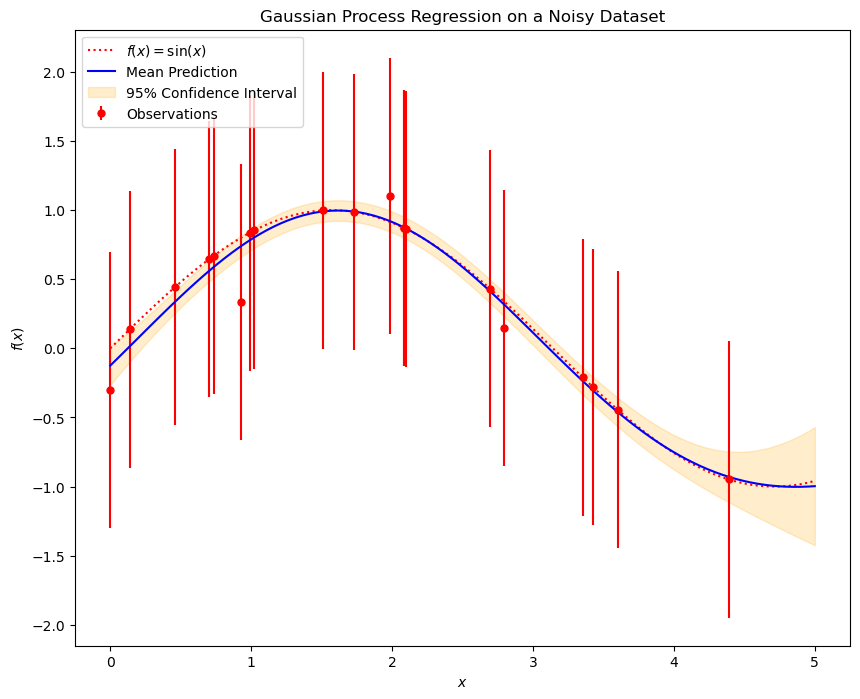

In [6]:
# Ejercicio 6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Generando datos simulados
np.random.seed(1)  # Para reproducibilidad
X = np.sort(5 * np.random.rand(20, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(4))  # Agregar ruido a cada 5to punto

# Instanciando un kernel gaussiano con parámetros iniciales
kernel = C(1.0, (1e-2, 1e2)) * RBF(10, (1e-2, 1e2))

# Crear el modelo de regresión gaussiano
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1**2, n_restarts_optimizer=10)

# Ajustar el modelo usando los datos observados
gp.fit(X, y)

# Hacer predicciones sobre una malla de puntos para evaluar
x = np.linspace(0, 5, 100).reshape(-1, 1)
y_pred, sigma = gp.predict(x, return_std=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(x, np.sin(x), "r:", label=r"$f(x) = \sin(x)$")
plt.errorbar(X.ravel(), y, 1, fmt="r.", markersize=10, label="Observations")
plt.plot(x, y_pred, "b-", label="Mean Prediction")
plt.fill_between(
    x.ravel(),
    y_pred - 1.96 * sigma,
    y_pred + 1.96 * sigma,
    alpha=0.2,
    color="orange",
    label="95% Confidence Interval",
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian Process Regression on a Noisy Dataset")
plt.legend(loc="upper left")
plt.show()

### 9.8.

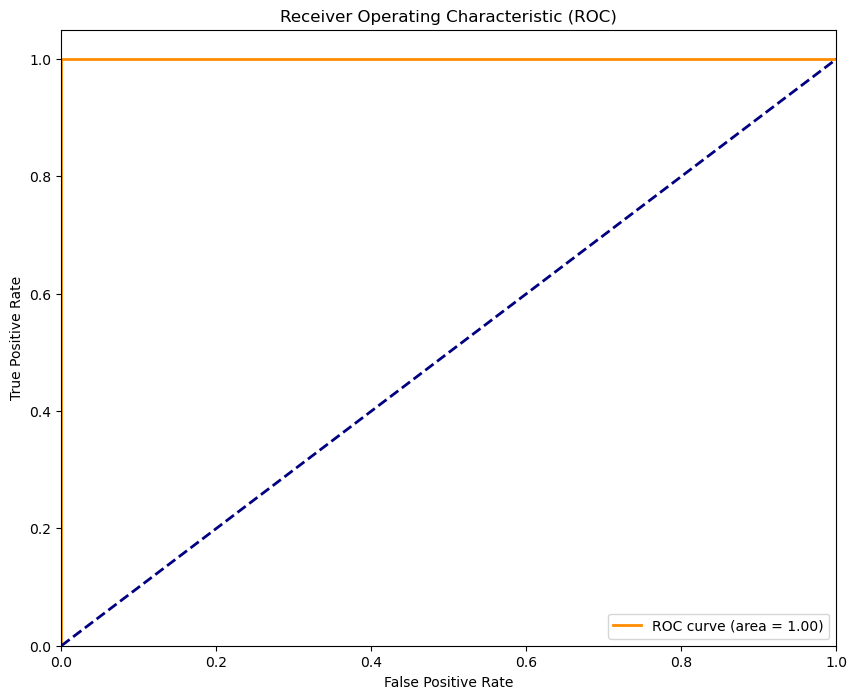

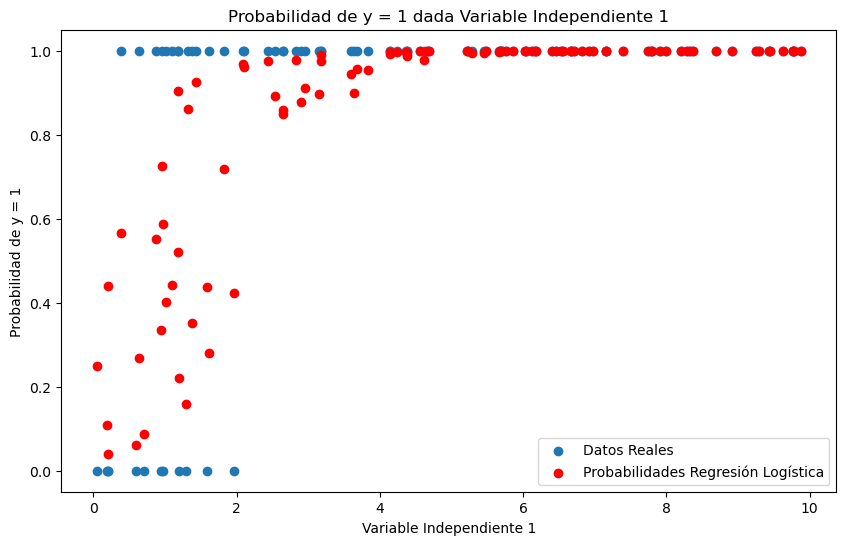

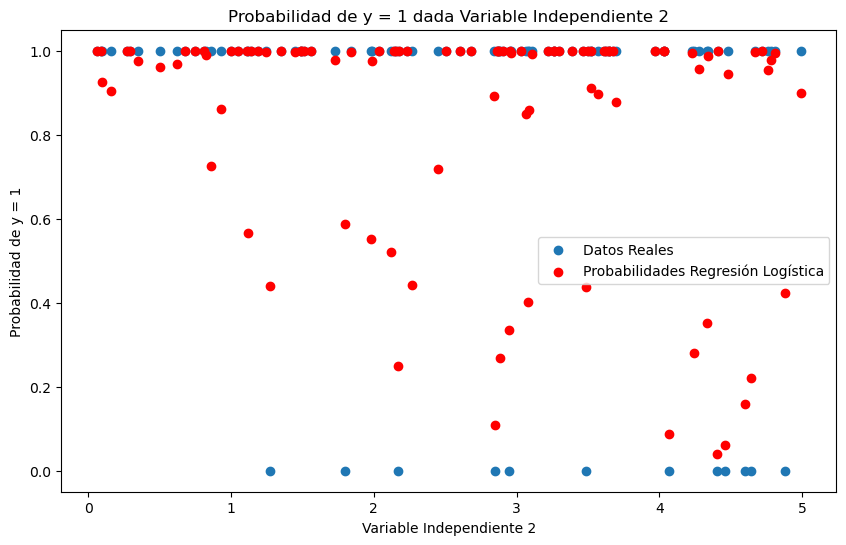

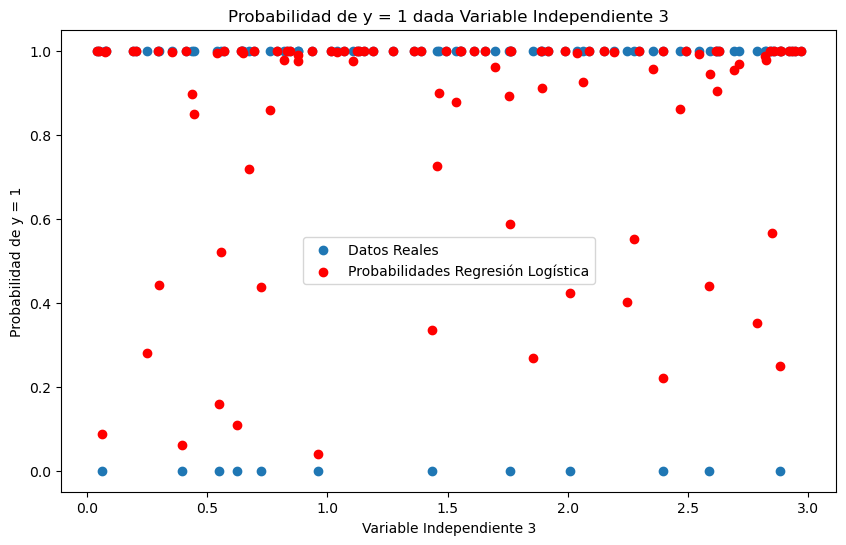

In [ ]:
# Ejercicio 7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100, 1) * 10
x2 = np.random.rand(100, 1) * 5
x3 = np.random.rand(100, 1) * 3
X = np.hstack((x1, x2, x3))

# Generando una variable dependiente binaria simulada con ruido
y = (
    2 * x1.flatten() - x2.flatten() + 0.5 * x3.flatten() + np.random.randn(100) > 0
).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Ajustando un modelo de Regresión Logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predicciones en términos de probabilidad
probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Graficando la curva ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

# Graficando los resultados para cada variable independiente
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, i], y, label="Datos Reales")
    plt.scatter(
        X[:, i],
        logistic_model.predict_proba(X)[:, 1],
        color="red",
        label="Probabilidades Regresión Logística",
    )
    plt.xlabel(f"Variable Independiente {i+1}")
    plt.ylabel("Probabilidad de y = 1")
    plt.title(f"Probabilidad de y = 1 dada Variable Independiente {i+1}")
    plt.legend()
    plt.show()

### 9.9.

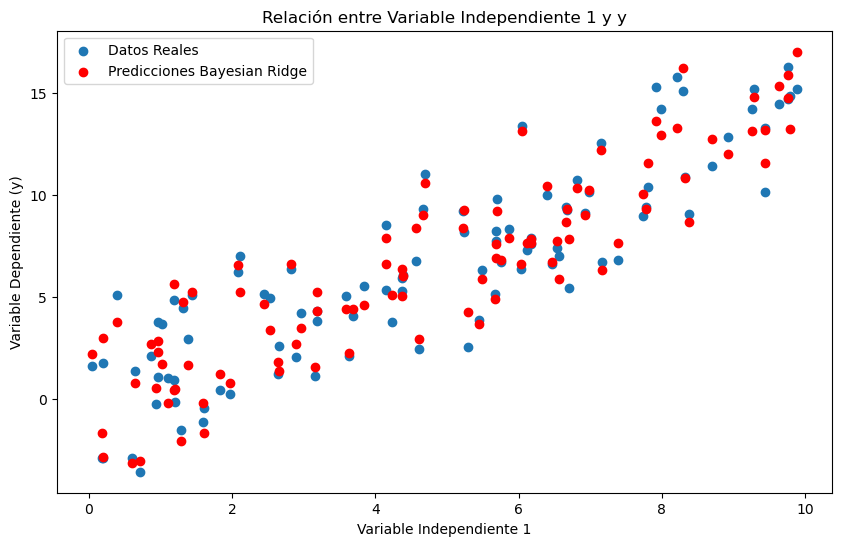

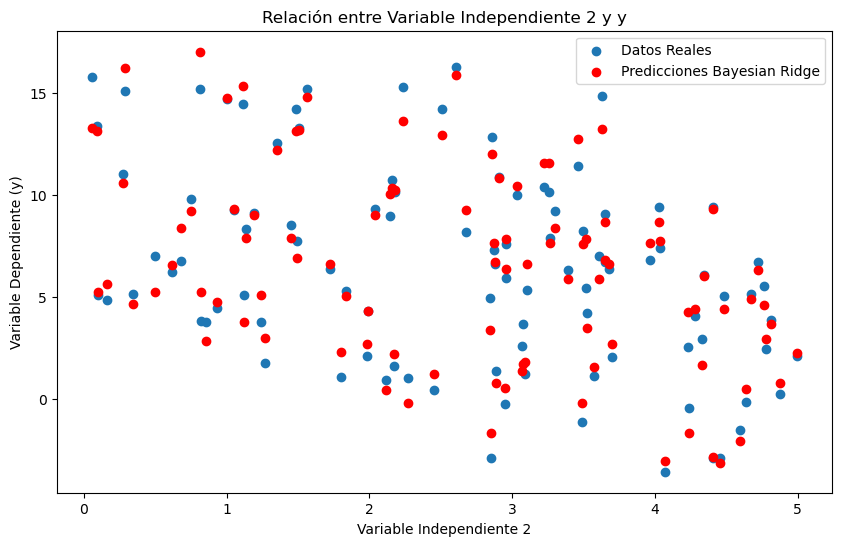

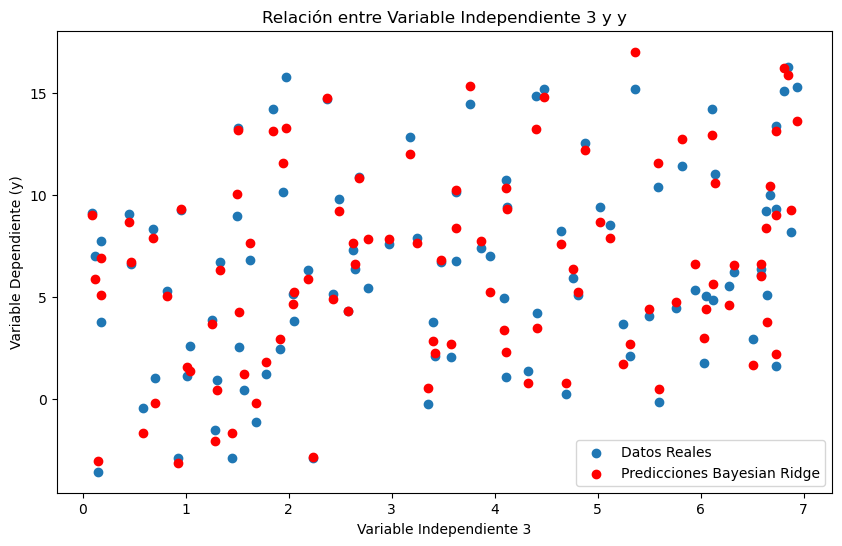

Parámetros del modelo de regresión bayesiana:
Intercepto: 0.2249084720299086
Coeficientes: [ 1.44248611 -1.07911674  0.63464782]


In [8]:
# Ejercicio 8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100, 1) * 10
x2 = np.random.rand(100, 1) * 5
x3 = np.random.rand(100, 1) * 7
X = np.hstack((x1, x2, x3))
y = 1.5 * x1.flatten() - x2.flatten() + 0.6 * x3.flatten() + np.random.randn(100)

# Ajustando un modelo de regresión bayesiana
bayes_model = BayesianRidge()
bayes_model.fit(X, y)

# Predicciones
predictions = bayes_model.predict(X)

# Graficando los resultados para cada variable independiente
for i in range(X.shape[1]):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, i], y, label="Datos Reales")
    plt.scatter(X[:, i], predictions, color="red", label="Predicciones Bayesian Ridge")
    plt.xlabel(f"Variable Independiente {i+1}")
    plt.ylabel("Variable Dependiente (y)")
    plt.title(f"Relación entre Variable Independiente {i+1} y y")
    plt.legend()
    plt.show()

# Imprimiendo los parámetros estimados
print("Parámetros del modelo de regresión bayesiana:")
print(f"Intercepto: {bayes_model.intercept_}")
print(f"Coeficientes: {bayes_model.coef_}")

### 9.10.

Text(0.5, 1.0, 'Relación entre Variables Independientes y y')

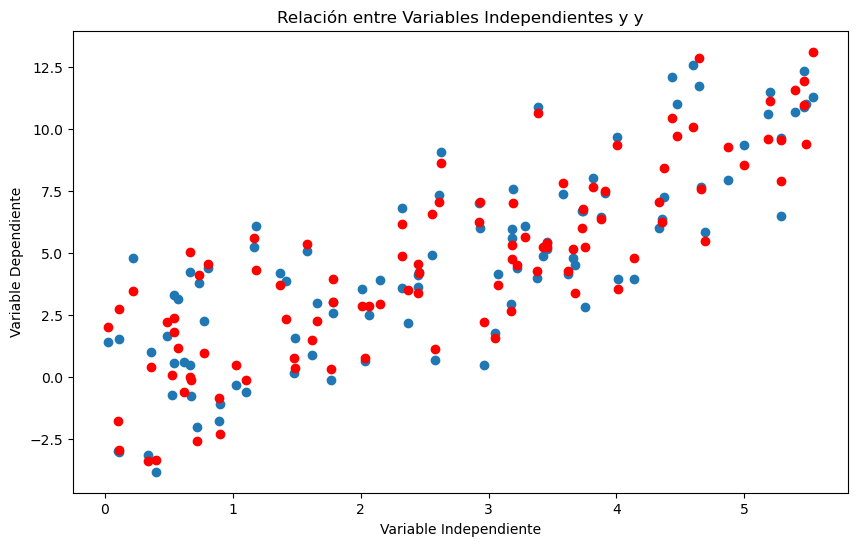

In [9]:
# Ejercicio 9
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression

# Generando datos simulados con tres variables independientes
np.random.seed(0)
x1 = np.random.rand(100) * 5.6
x2 = np.random.rand(100) * 5
x3 = np.random.rand(100) * 8
X = np.column_stack((x1, x2, x3))
y = 2 * x1 - x2 + 0.5 * x3 + np.random.randn(100)

# Ajustando un modelo de regresión Lasso para la selección de características
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
sparse_features = lasso.coef_ != 0

# Utilizando solo las características seleccionadas
X_sparse = X[:, sparse_features]

# Ajustando una regresión lineal estándar a las proyecciones resultantes
lin_reg = LinearRegression()
lin_reg.fit(X_sparse, y)

# Predicciones
predictions = lin_reg.predict(X_sparse)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, label="Datos Reales")
plt.scatter(X[:, 0], predictions, color="red", label="Predicciones Regresión Dispersa")
plt.xlabel("Variable Independiente")
plt.ylabel("Variable Dependiente")
plt.title("Relación entre Variables Independientes y y")

### 9.11.

Detalles del modelo SGDClassifier:
Coeficientes: [[ 60.72707076 -93.49939036]]
Intercepto: [-260.66196175]

Accuracy: 0.9
Confusion Matrix:
 [[16  2]
 [ 0  2]]


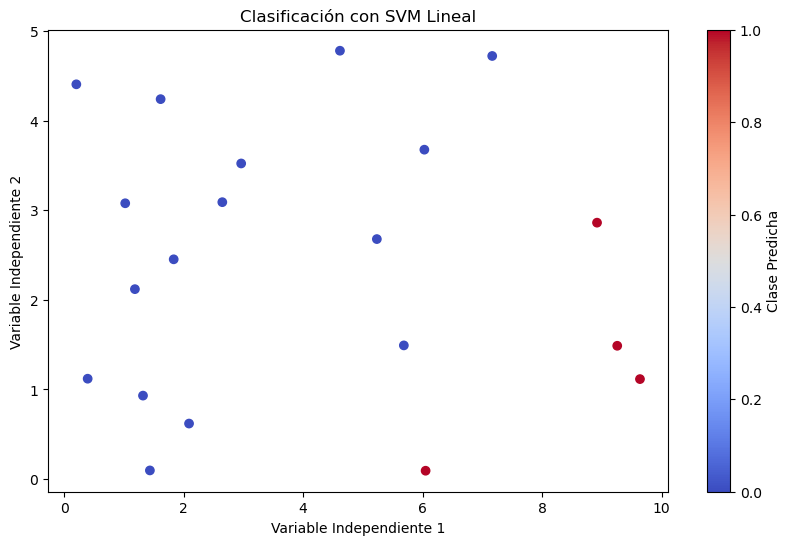

In [10]:
# Ejercicio 10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
X = np.column_stack((x1, x2))

# Creando una variable objetivo binaria
y = (2 * x1 - x2 > 15).astype(int)  # Ajuste en el umbral para asegurar dos clases

# Verificando que haya al menos dos clases
if len(np.unique(y)) < 2:
    raise ValueError("Número insuficiente de clases en los datos.")

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustando el modelo de clasificación lineal (SVM lineal)
sgd_clf = SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3, random_state=0)
sgd_clf.fit(X_train, y_train)

# Imprimiendo los detalles del modelo
print("Detalles del modelo SGDClassifier:")
print(f"Coeficientes: {sgd_clf.coef_}")
print(f"Intercepto: {sgd_clf.intercept_}")

# Realizando predicciones en el conjunto de prueba
y_pred = sgd_clf.predict(X_test)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimiendo los resultados de la evaluación
print("\nAccuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm")
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Independiente 2")
plt.title("Clasificación con SVM Lineal")
plt.colorbar(label="Clase Predicha")
plt.show()

### 9.12.

Detalles del modelo LogisticRegression:
Coeficientes: [[ 2.00852408 -0.96045563]]
Intercepto: [-15.25396181]

Accuracy: 1.0
Confusion Matrix:
 [[18  0]
 [ 0  2]]


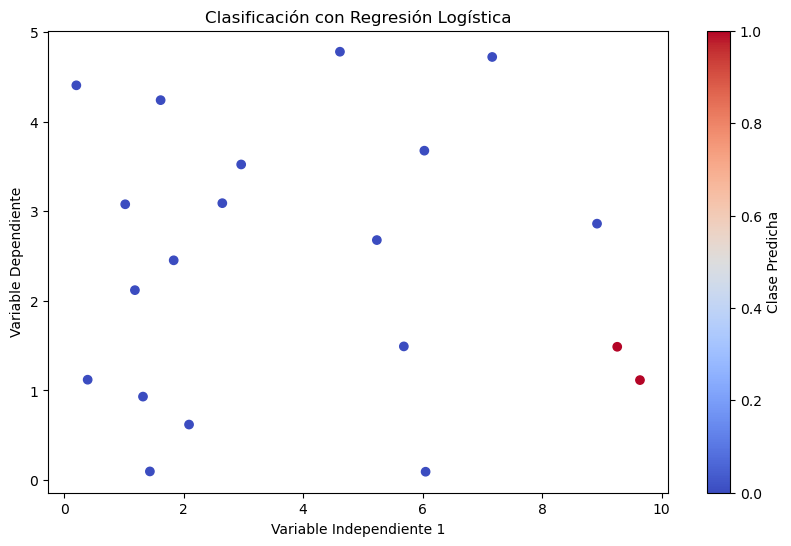

In [11]:
# Ejercicio 11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
X = np.column_stack((x1, x2))

# Creando una variable objetivo binaria
y = (2 * x1 - x2 > 15).astype(int)  # Ajuste en el umbral para asegurar dos clases

# Verificando que haya al menos dos clases
if len(np.unique(y)) < 2:
    raise ValueError("Número insuficiente de clases en los datos.")

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustando el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Imprimiendo los detalles del modelo
print("Detalles del modelo LogisticRegression:")
print(f"Coeficientes: {log_reg.coef_}")
print(f"Intercepto: {log_reg.intercept_}")

# Realizando predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

# Evaluando el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimiendo los resultados de la evaluación
print("\nAccuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap="coolwarm")
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Dependiente")
plt.title("Clasificación con Regresión Logística")
plt.colorbar(label="Clase Predicha")
plt.show()

### 9.13.

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations 25
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                   80
Model:                         Probit   Df Residuals:                       77
Method:                           MLE   Df Model:                            2
Date:                Tue, 05 Aug 2025   Pseudo R-squ.:                   1.000
Time:                        13:52:33   Log-Likelihood:                 0.0000
converged:                       True   LL-Null:                       -28.137
Covariance Type:            nonrobust   LLR p-value:                 6.030e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -163.2940   7.88e+14  -2.07e-13      1.000   -1.55e+15    1.55e+15
x1            23.5197   1.6

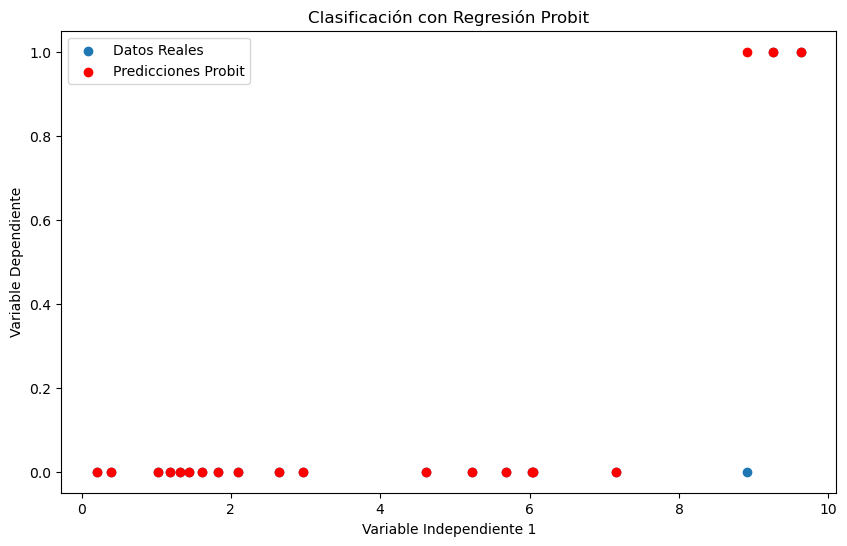

In [12]:
# Ejercicio 12
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
X = np.column_stack((x1, x2))
y = (2 * x1 - x2 > 15).astype(int)  # Creando una variable objetivo binaria

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Ajustando el modelo de regresión Probit
X_train = sm.add_constant(X_train)  # Agregando una constante
X_test = sm.add_constant(X_test)
probit_model = sm.Probit(y_train, X_train)
probit_results = probit_model.fit()

# Imprimiendo el resumen del modelo
print(probit_results.summary())

# Realizando predicciones en el conjunto de prueba
y_pred = probit_results.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int)  # Clasificación binaria

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 1], y_test, label="Datos Reales")
plt.scatter(X_test[:, 1], y_pred_class, color="red", label="Predicciones Probit")
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Dependiente")
plt.title("Clasificación con Regresión Probit")
plt.legend()
plt.show()

### 9.14.

Parámetros estimados del modelo Tobit:
Constante: 0.6460987449773138
Beta 1: 1.9086903674064577
Beta 2: -1.1511386806413635
Sigma: 1.6574121081866273


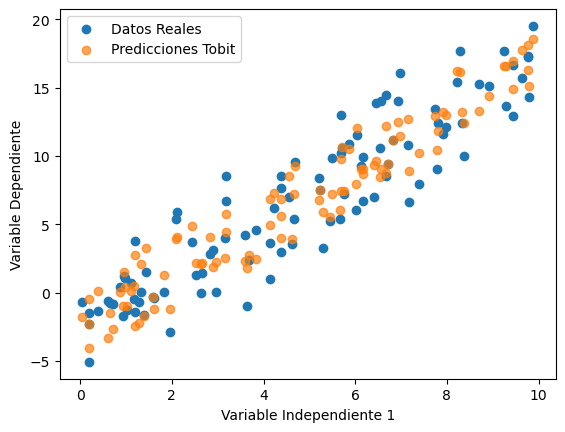

In [13]:
# Ejercicio 13
import numpy as np
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import minimize

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
y = 2 * x1 - x2 + np.random.randn(100) * 2

# Censurando los datos
censoring_limit = 10
y_censored = np.where(y > censoring_limit, censoring_limit, y)

# Definiendo la función de verosimilitud para el modelo Tobit
def tobit_likelihood(params):
    const, beta1, beta2, sigma = params
    X_beta = const + beta1 * X[:, 1] + beta2 * X[:, 2]
    likelihood_noncensored = norm.logpdf(
        y[y < censoring_limit], loc=X_beta[y < censoring_limit], scale=sigma
    )
    likelihood_censored = norm.logsf(
        censoring_limit, loc=X_beta[y >= censoring_limit], scale=sigma
    )
    return -(np.sum(likelihood_noncensored) + np.sum(likelihood_censored))


# Inicialización de parámetros (const, beta1, beta2, sigma)
initial_params = np.array([0, 0, 0, 1])

# Maximización de la función de verosimilitud
result = minimize(tobit_likelihood, initial_params, method="L-BFGS-B")

# Imprimiendo los resultados
print("Parámetros estimados del modelo Tobit:")
print("Constante:", result.x[0])
print("Beta 1:", result.x[1])
print("Beta 2:", result.x[2])
print("Sigma:", result.x[3])

# Realizando predicciones
def predict_tobit(params, X):
    return params[0] + params[1] * X[:, 1] + params[2] * X[:, 2]


predictions = predict_tobit(result.x, X)

# Graficando los resultados
import matplotlib.pyplot as plt

plt.scatter(x1, y, label="Datos Reales")
plt.scatter(x1, predictions, label="Predicciones Tobit", alpha=0.7)
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Dependiente")
plt.legend()
plt.show()

### 9.15.

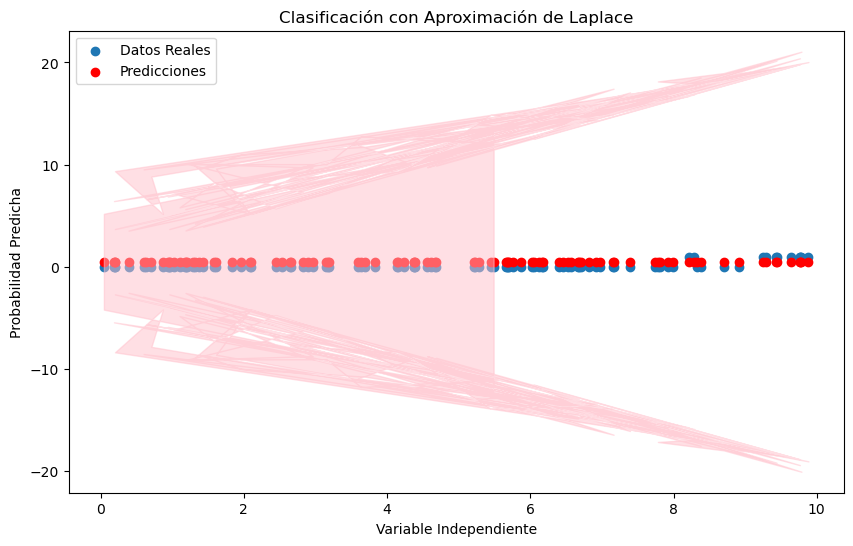

In [ ]:
# Ejercicio 14
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100, 1) * 10
x2 = np.random.rand(100, 1) * 5
X = np.column_stack((x1, x2))
X = np.hstack((np.ones(X.shape[0]).reshape(-1, 1), X))  # Añadir intercepto
y = (2 * x1.flatten() - x2.flatten() > 15).astype(int)  # Datos de clasificación

# Función de log-verosimilitud negativa para regresión logística
def log_likelihood(beta, X, y):
    z = X @ beta
    return -np.sum(y * z - np.log1p(np.exp(z)))


# Función para calcular el gradiente
def gradient(beta, X, y):
    z = X @ beta
    prob = 1 / (1 + np.exp(-z))
    return X.T @ (prob - y)


# Encontrando el MAP mediante optimización
result = minimize(
    lambda beta: -log_likelihood(beta, X, y),
    np.zeros(X.shape[1]),
    jac=lambda beta: -gradient(beta, X, y),
    method="BFGS",
)
beta_map = result.x
covariance_matrix = result.hess_inv  # Aproximación de la matriz de covarianza

# Realizando predicciones usando la aproximación de Laplace
def predict(X, beta, covariance_matrix):
    prob = 1 / (1 + np.exp(-X @ beta))

    # Calcular varianza predictiva
    var = np.sum((X @ covariance_matrix) * X, axis=1)
    return prob, var


prob, var = predict(X, beta_map, covariance_matrix)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, label="Datos Reales")
plt.scatter(X[:, 1], prob, color="red", label="Predicciones")
plt.fill_between(
    X[:, 1],
    prob - 1.96 * np.sqrt(var),
    prob + 1.96 * np.sqrt(var),
    color="pink",
    alpha=0.5,
)
plt.xlabel("Variable Independiente")
plt.ylabel("Probabilidad Predicha")
plt.title("Clasificación con Aproximación de Laplace")
plt.legend()
plt.show()

### 9.16.

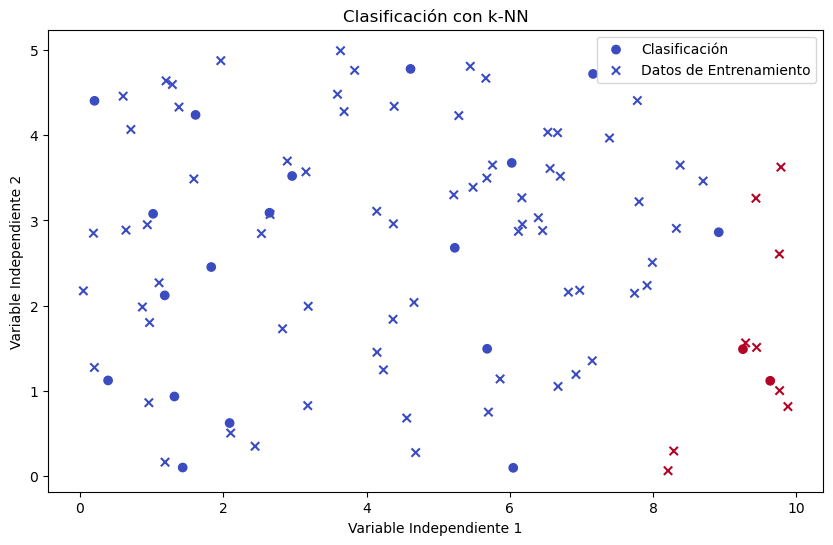

In [15]:
# Ejercicio 15
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Generando datos simulados
np.random.seed(0)
x1 = np.random.rand(100) * 10
x2 = np.random.rand(100) * 5
X = np.column_stack((x1, x2))

# Creando una variable objetivo binaria
y = (2 * x1 - x2 > 15).astype(int)

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creando y ajustando el modelo k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = knn.predict(X_test)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_pred,
    cmap="coolwarm",
    marker="o",
    label="Clasificación",
)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap="coolwarm",
    marker="x",
    label="Datos de Entrenamiento",
)
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Independiente 2")
plt.title("Clasificación con k-NN")
plt.legend()
plt.show()

### 9.17.

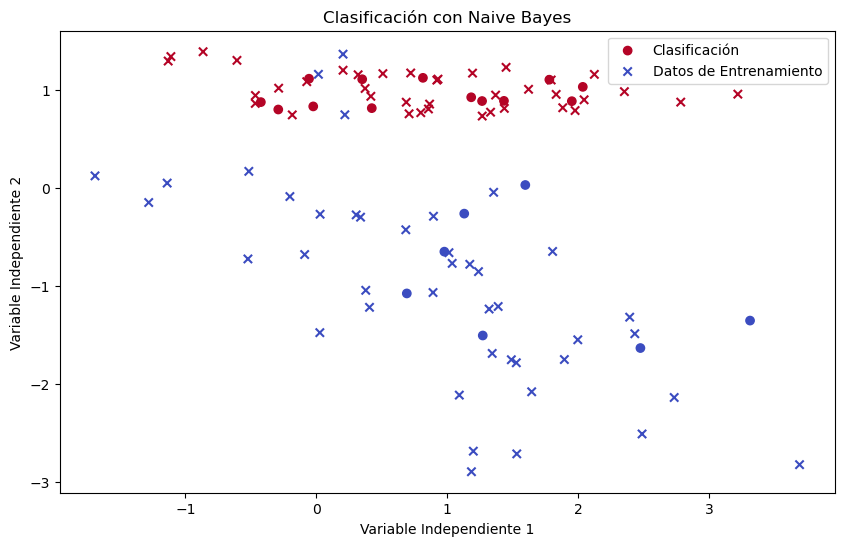

In [16]:
# Ejercicio 16
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generando un nuevo conjunto de datos
X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=0
)

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creando y ajustando el modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = nb.predict(X_test)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_pred,
    cmap="coolwarm",
    marker="o",
    label="Clasificación",
)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap="coolwarm",
    marker="x",
    label="Datos de Entrenamiento",
)
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Independiente 2")
plt.title("Clasificación con Naive Bayes")
plt.legend()
plt.show()

### 9.18.

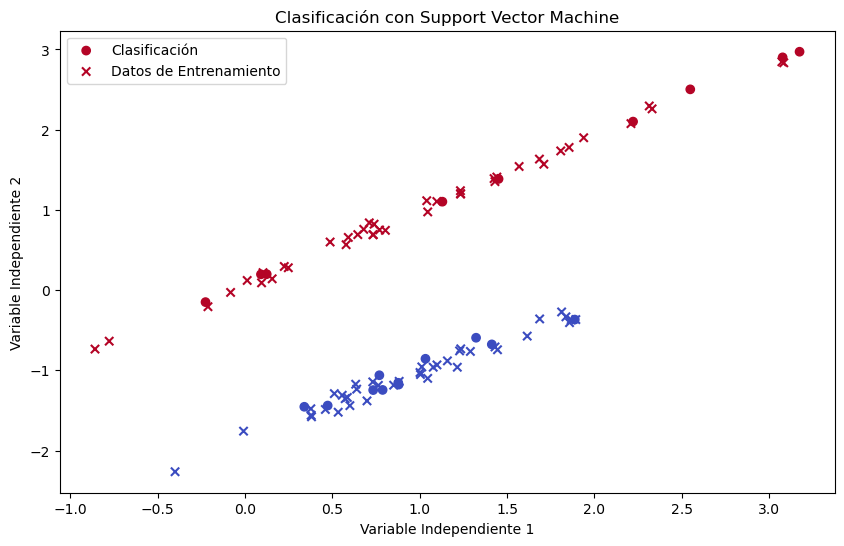

In [17]:
# Ejercicio 17
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generando un nuevo conjunto de datos
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42,
)

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creando y ajustando el modelo SVM
svm_clf = SVC(kernel="linear")  # Puedes probar otros núcleos como 'rbf', 'poly', etc.
svm_clf.fit(X_train, y_train)

# Realizando predicciones en el conjunto de prueba
y_pred = svm_clf.predict(X_test)

# Graficando los resultados
plt.figure(figsize=(10, 6))
plt.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_pred,
    cmap="coolwarm",
    marker="o",
    label="Clasificación",
)
plt.scatter(
    X_train[:, 0],
    X_train[:, 1],
    c=y_train,
    cmap="coolwarm",
    marker="x",
    label="Datos de Entrenamiento",
)
plt.xlabel("Variable Independiente 1")
plt.ylabel("Variable Independiente 2")
plt.title("Clasificación con Support Vector Machine")
plt.legend()
plt.show()

### 9.19.

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de Confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


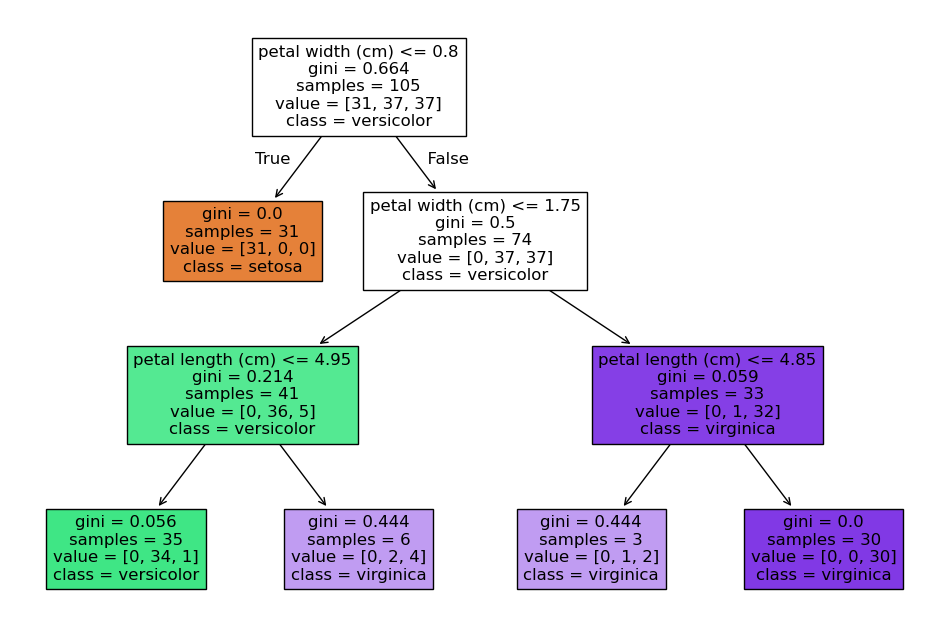

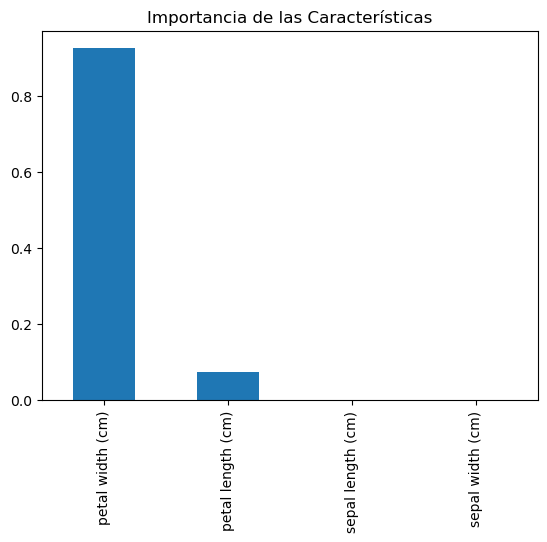

In [18]:
# Ejercicio 18
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Dividir en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear un modelo de árbol de decisión
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=list(target_names), filled=True)
plt.show()

# Importancia de las características
importancias = pd.Series(clf.feature_importances_, index=feature_names)
importancias.sort_values(ascending=False).plot(kind="bar")
plt.title("Importancia de las Características")
plt.show()

### 9.20.

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



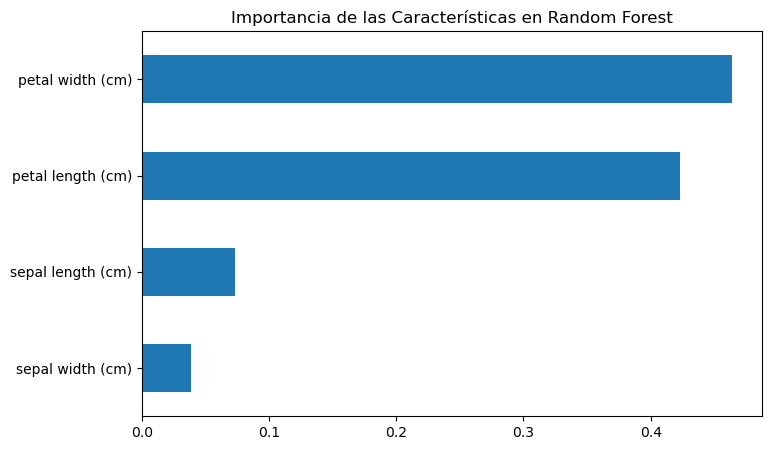

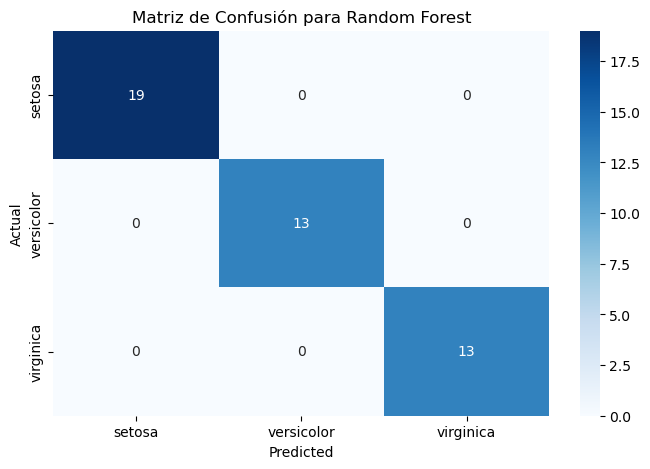

In [19]:
# Ejercicio 19
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Dividir en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear un modelo de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_clf.predict(X_test)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualizar la importancia de las características
importancias = pd.Series(rf_clf.feature_importances_, index=feature_names)
plt.figure(figsize=(8, 5))
importancias.sort_values().plot(kind="barh")
plt.title("Importancia de las Características en Random Forest")
plt.show()

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=target_names,
    yticklabels=target_names,
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Matriz de Confusión para Random Forest")
plt.show()

### 9.21.

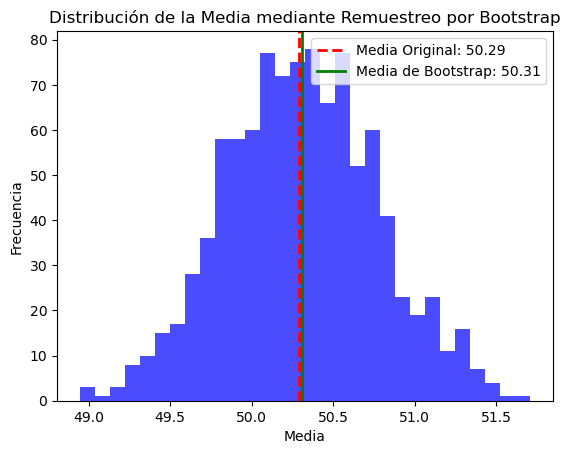

In [20]:
# Ejercicio 20
import numpy as np
import matplotlib.pyplot as plt

# Crear un conjunto de datos sintético
np.random.seed(42)
data = np.random.normal(
    loc=50, scale=15, size=1000
)  # 1000 datos con media 50 y desviación estándar 15

# Calcular la media original del conjunto de datos
original_mean = np.mean(data)

# Remuestreo por bootstrap
n_boots = 1000
bootstrap_means = []
for _ in range(n_boots):
    sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))

# Visualizar los resultados
plt.hist(bootstrap_means, bins=30, color="blue", alpha=0.7)
plt.axvline(
    original_mean,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Media Original: {original_mean:.2f}",
)
plt.axvline(
    np.mean(bootstrap_means),
    color="green",
    linestyle="-",
    linewidth=2,
    label=f"Media de Bootstrap: {np.mean(bootstrap_means):.2f}",
)
plt.title("Distribución de la Media mediante Remuestreo por Bootstrap")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

### 9.22.

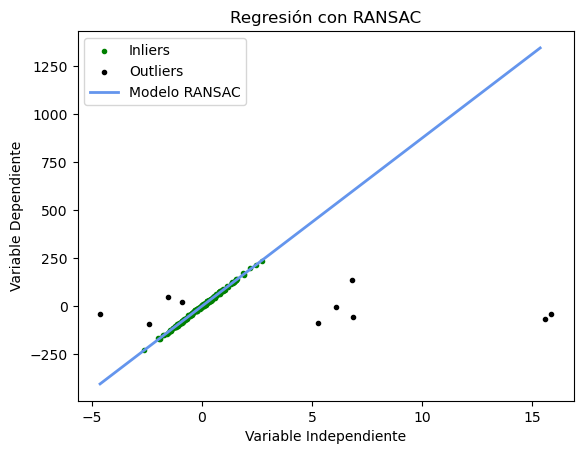

In [21]:
# Ejercicio 21
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression
from sklearn.datasets import make_regression

# Crear un conjunto de datos sintético con ruido
X, y, coef = make_regression(
    n_samples=200, n_features=1, noise=4.0, coef=True, random_state=42
)

# Añadir algunos valores atípicos
np.random.seed(42)
X[:10] += 10 * np.random.normal(size=(10, 1))
y[:10] += 50 * np.random.normal(size=10)

# Ajuste con RANSAC
ransac = RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Predicciones
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y_ransac = ransac.predict(line_X)

# Graficar los resultados
plt.scatter(X[inlier_mask], y[inlier_mask], color="green", marker=".", label="Inliers")
plt.scatter(
    X[outlier_mask], y[outlier_mask], color="black", marker=".", label="Outliers"
)
plt.plot(
    line_X, line_y_ransac, color="cornflowerblue", linewidth=2, label="Modelo RANSAC"
)
plt.legend()
plt.xlabel("Variable Independiente")
plt.ylabel("Variable Dependiente")
plt.title("Regresión con RANSAC")
plt.show()

### 9.23.

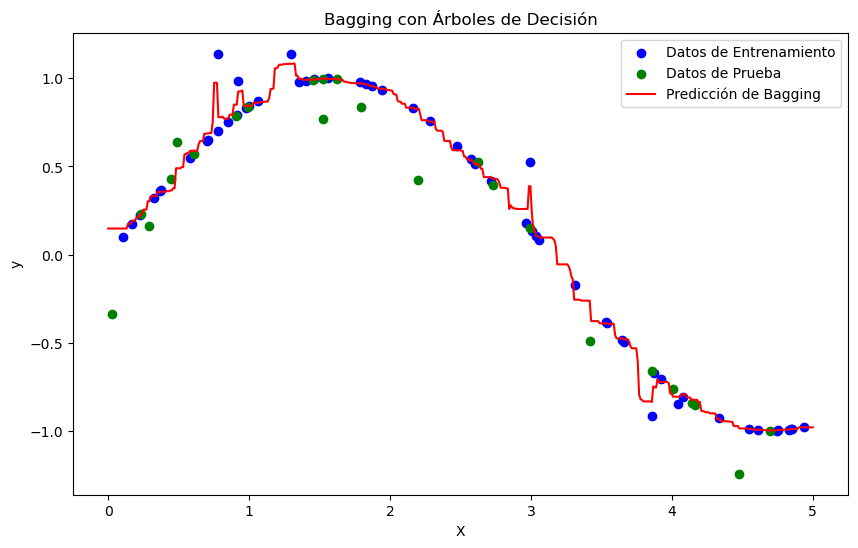

In [22]:
# Ejercicio 22
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# Generar datos sintéticos
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear modelo de bagging con árboles de decisión
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42
)
bagging_model.fit(X_train, y_train)

# Predecir y visualizar
X_plot = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = bagging_model.predict(X_plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Datos de Entrenamiento")
plt.scatter(X_test, y_test, color="green", label="Datos de Prueba")
plt.plot(X_plot, y_pred, color="red", label="Predicción de Bagging")
plt.title("Bagging con Árboles de Decisión")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 9.24.

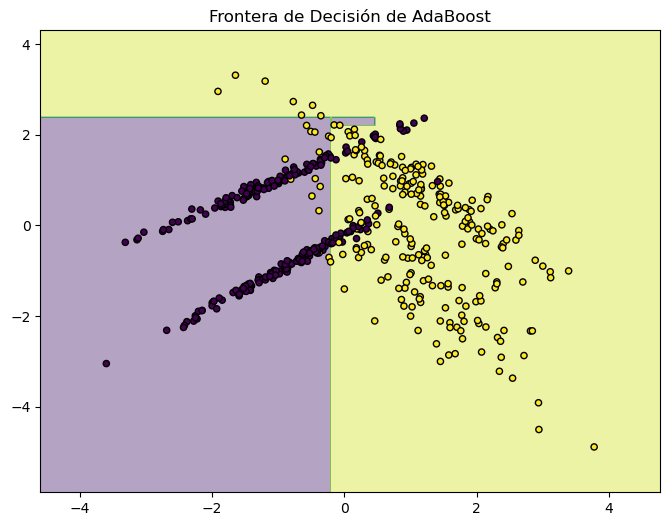

In [23]:
# Ejercicio 23
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Crear datos sintéticos para clasificación
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo AdaBoost
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    random_state=42,
)
ada_boost.fit(X_train, y_train)

# Función para graficar la frontera de decisión
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")


# Graficar la frontera de decisión
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_decision_boundary(ada_boost, X, y, ax)
ax.set_title("Frontera de Decisión de AdaBoost")
plt.show()

### 9.25.

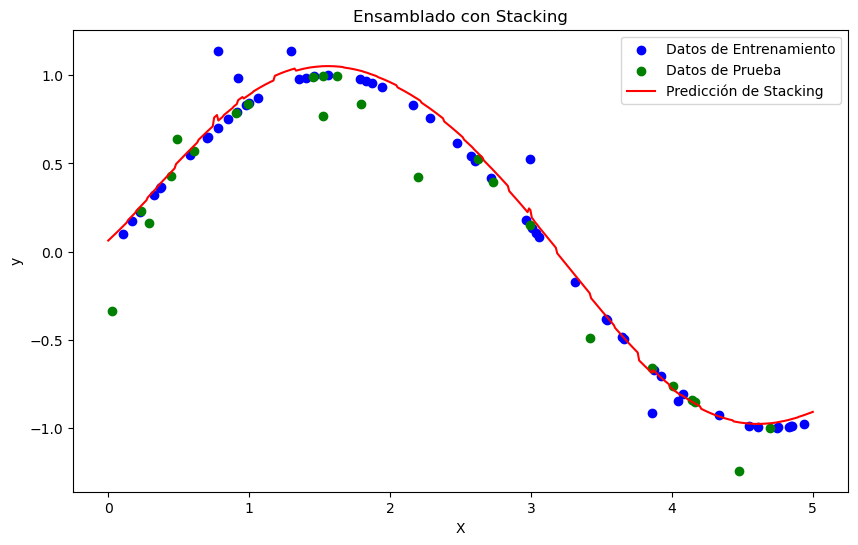

In [24]:
# Ejercicio 24
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Generar datos sintéticos
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(16))

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Definir modelos base y un meta-modelo
base_models = [
    ("lr", LinearRegression()),
    ("dt", DecisionTreeRegressor()),
    ("svr", SVR()),
]
meta_model = LinearRegression()

# Crear modelo de Stacking
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# Predecir y visualizar
X_plot = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = stacking_model.predict(X_plot)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Datos de Entrenamiento")
plt.scatter(X_test, y_test, color="green", label="Datos de Prueba")
plt.plot(X_plot, y_pred, color="red", label="Predicción de Stacking")
plt.title("Ensamblado con Stacking")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### 9.26.

LogisticRegression 0.8833333333333333
SVC 0.9166666666666666
DecisionTreeClassifier 0.9333333333333333
VotingClassifier 0.9066666666666666


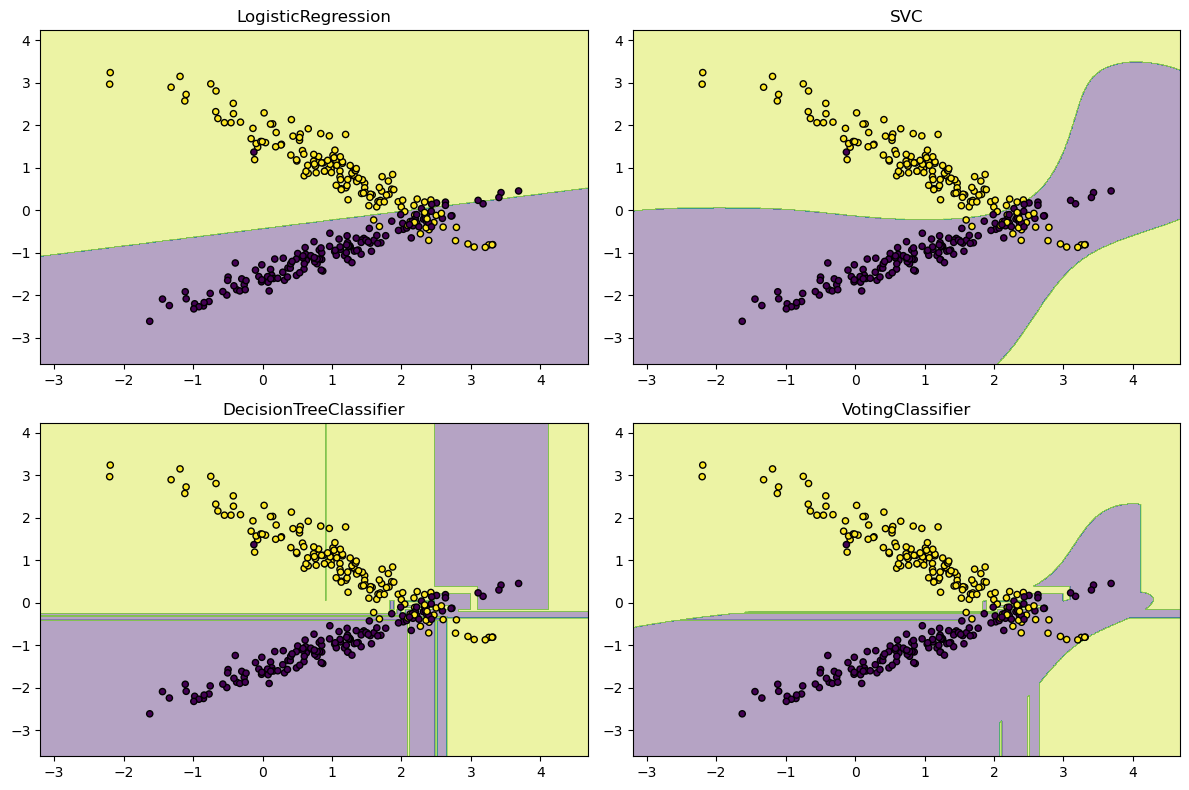

In [25]:
# Ejercicio 25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Definir los modelos base
log_clf = LogisticRegression()
svm_clf = SVC(probability=True)
tree_clf = DecisionTreeClassifier()

# Crear un meta-modelo de votación
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("svc", svm_clf), ("dt", tree_clf)], voting="soft"
)
voting_clf.fit(X_train, y_train)

# Evaluar y comparar los modelos
for clf in (log_clf, svm_clf, tree_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# Función para visualizar las decisiones de los clasificadores
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title(clf.__class__.__name__)


# Crear gráficos de límites de decisión
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
plot_decision_boundary(log_clf, X_test, y_test, axarr[0, 0])
plot_decision_boundary(svm_clf, X_test, y_test, axarr[0, 1])
plot_decision_boundary(tree_clf, X_test, y_test, axarr[1, 0])
plot_decision_boundary(voting_clf, X_test, y_test, axarr[1, 1])
plt.tight_layout()
plt.show()

### 9.27.

Las 10 mejores reglas de asociación ordenadas por lift:
          antecedents consequents  support  confidence      lift
41    (Cereal, Queso)   (Manzana)     0.05    0.500000  1.428571
58   (Leche, Manzana)     (Queso)     0.06    0.545455  1.398601
38          (Manzana)     (Queso)     0.17    0.485714  1.245421
37            (Queso)   (Manzana)     0.17    0.435897  1.245421
56     (Leche, Queso)   (Manzana)     0.06    0.428571  1.224490
49  (Manzana, Huevos)       (Pan)     0.06    0.500000  1.162791
48      (Pan, Huevos)   (Manzana)     0.06    0.400000  1.142857
43  (Cereal, Manzana)     (Queso)     0.05    0.416667  1.068376
35              (Pan)   (Manzana)     0.16    0.372093  1.063123
36          (Manzana)       (Pan)     0.16    0.457143  1.063123


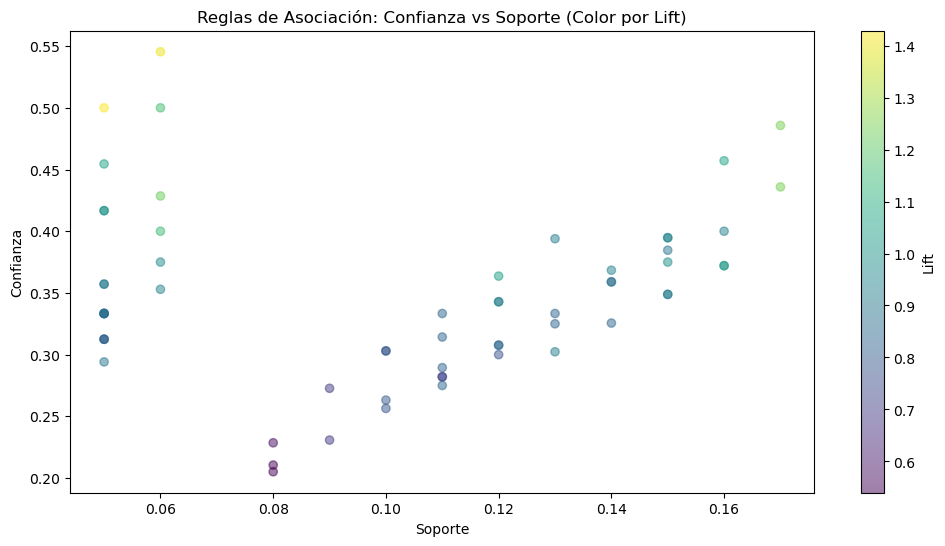

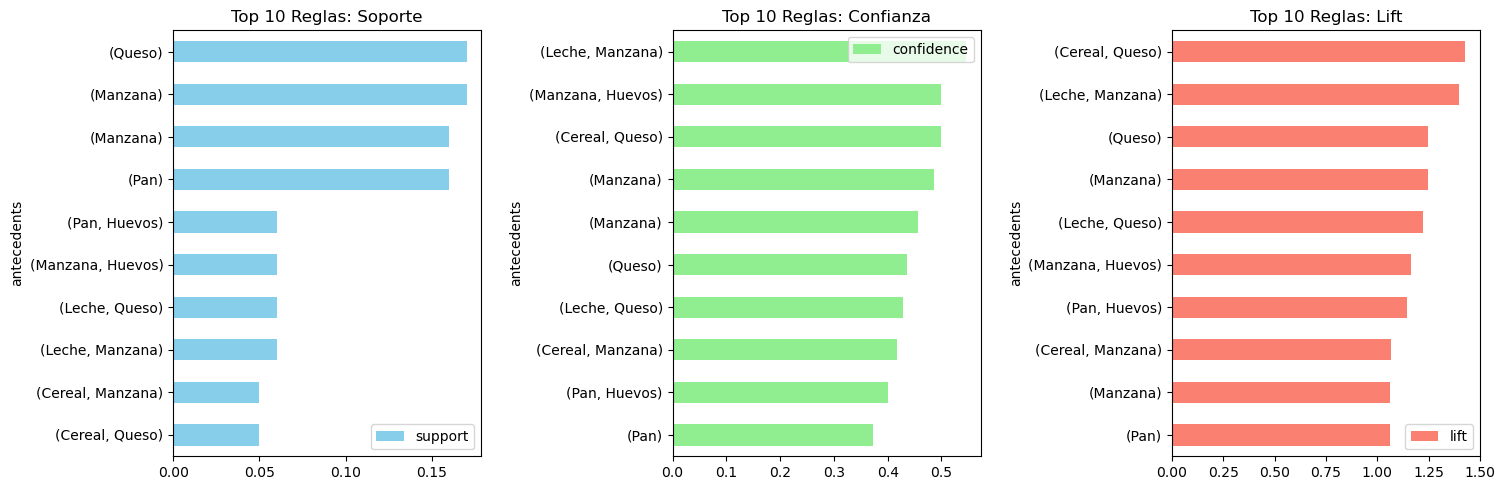

In [26]:
# Ejercicio 26
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import random

# Crear un conjunto de datos sintético de transacciones
random.seed(42)
items = ["Leche", "Pan", "Manzana", "Cereal", "Jugo", "Huevos", "Queso"]
transactions = [
    [random.choice(items) for _ in range(random.randint(2, 5))] for _ in range(100)
]

# Convertir las transacciones en un formato adecuado para Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar el algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Ordenar y mostrar las 10 mejores reglas
top_rules = rules.sort_values(by="lift", ascending=False).head(10)
print("Las 10 mejores reglas de asociación ordenadas por lift:")
print(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])

# Visualización de todas las reglas: Soporte vs. Confianza (color por Lift)
plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    rules["support"], rules["confidence"], alpha=0.5, c=rules["lift"], cmap="viridis"
)
plt.colorbar(scatter, label="Lift")
plt.title("Reglas de Asociación: Confianza vs Soporte (Color por Lift)")
plt.xlabel("Soporte")
plt.ylabel("Confianza")
plt.show()

# Visualización de las 10 mejores reglas: Soporte, Confianza, Lift
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
top_rules.sort_values(by="support", ascending=True).plot.barh(
    x="antecedents", y="support", ax=axs[0], color="skyblue"
)
axs[0].set_title("Top 10 Reglas: Soporte")
top_rules.sort_values(by="confidence", ascending=True).plot.barh(
    x="antecedents", y="confidence", ax=axs[1], color="lightgreen"
)
axs[1].set_title("Top 10 Reglas: Confianza")
top_rules.sort_values(by="lift", ascending=True).plot.barh(
    x="antecedents", y="lift", ax=axs[2], color="salmon"
)
axs[2].set_title("Top 10 Reglas: Lift")
plt.tight_layout()
plt.show()

### 9.28.

LinearDiscriminantAnalysis Accuracy: 0.8866666666666667


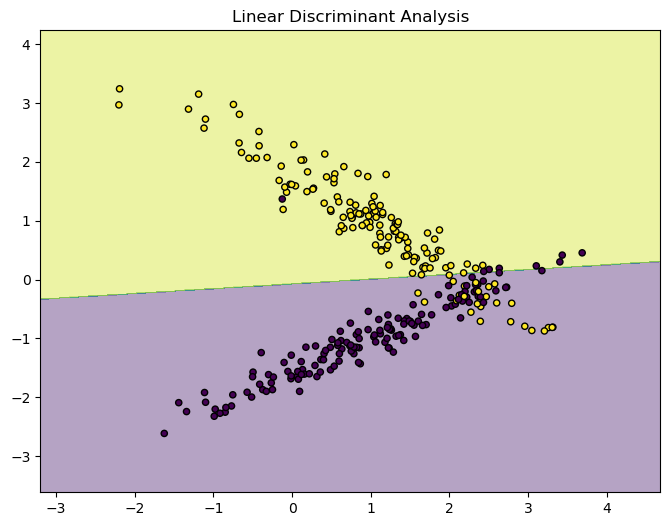

In [27]:
# Ejercicio 27
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el clasificador LDA
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

# Evaluar el clasificador
y_pred = lda_clf.predict(X_test)
print("LinearDiscriminantAnalysis Accuracy:", accuracy_score(y_test, y_pred))

# Función para visualizar las decisiones del clasificador
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title("Linear Discriminant Analysis")


# Crear el gráfico de límites de decisión
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(lda_clf, X_test, y_test, ax)
plt.show()

### 9.29.

QuadraticDiscriminantAnalysis Accuracy: 0.94


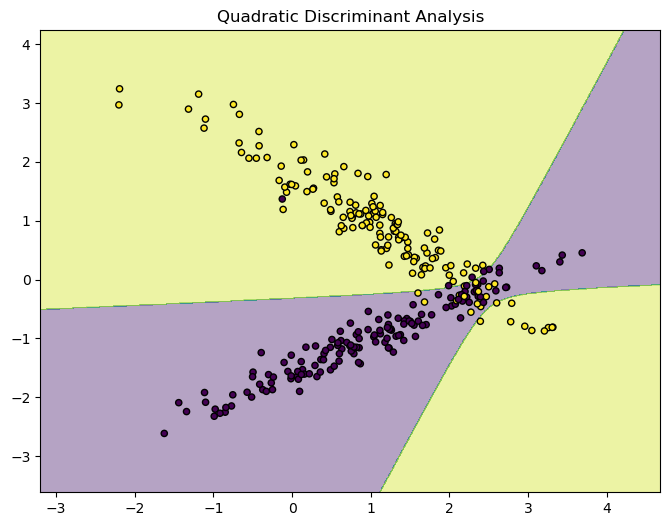

In [28]:
# Ejercicio 28
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el clasificador QDA
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

# Evaluar el clasificador
y_pred = qda_clf.predict(X_test)
print("QuadraticDiscriminantAnalysis Accuracy:", accuracy_score(y_test, y_pred))

# Función para visualizar las decisiones del clasificador
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title("Quadratic Discriminant Analysis")


# Crear el gráfico de límites de decisión
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(qda_clf, X_test, y_test, ax)
plt.show()

### 9.30.

Perceptron Accuracy: 0.8866666666666667


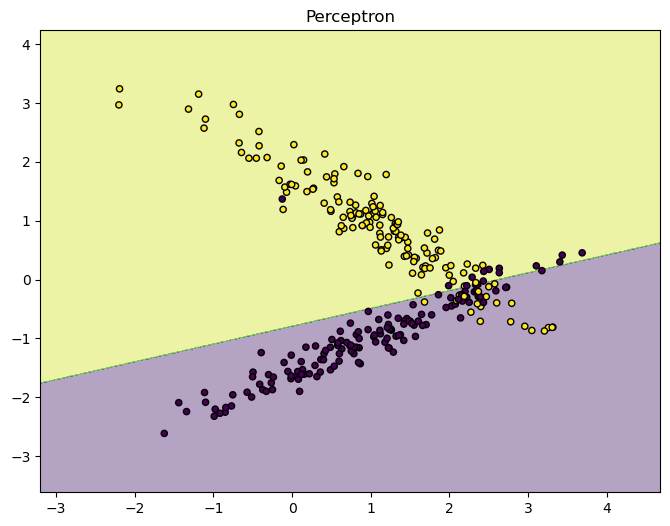

In [29]:
# Ejercicio 29
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Crear y entrenar el perceptrón
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Evaluar el clasificador
y_pred = perceptron.predict(X_test)
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred))

# Función para visualizar las decisiones del clasificador
def plot_decision_boundary(clf, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title("Perceptron")


# Crear el gráfico de límites de decisión
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(perceptron, X_test, y_test, ax)
plt.show()

### 9.31.

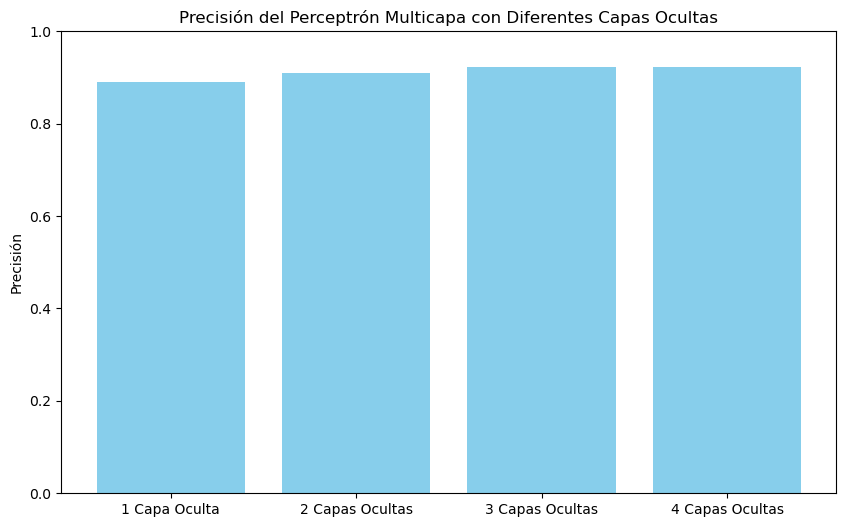

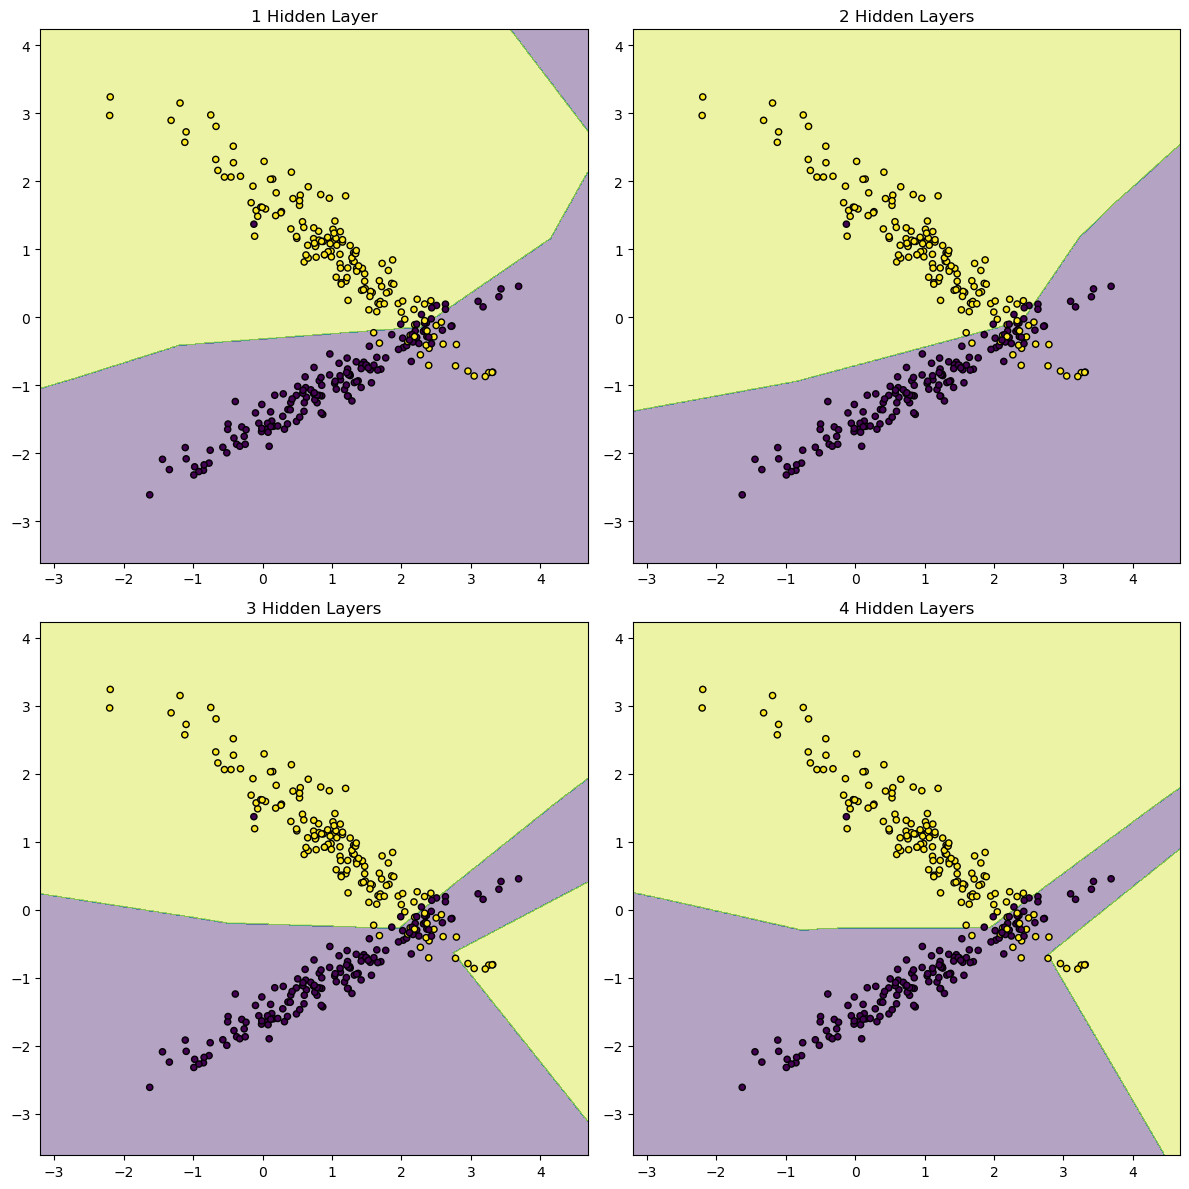

In [ ]:
# Ejercicio 30
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Función para visualizar las decisiones del clasificador
def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.01),
        np.arange(y_min, y_max, 0.01)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title(title)

# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Crear y entrenar clasificadores MLP con diferentes números de capas ocultas
hidden_layers = [(5,), (5, 5), (5, 5, 5), (5, 5, 5, 5)]
mlp_classifiers = []
accuracies = []  # <-- inicializamos la lista

for hidden_layer in hidden_layers:
    mlp = MLPClassifier(
        hidden_layer_sizes=hidden_layer,
        random_state=42,
        max_iter=2000
    )
    mlp.fit(X_train, y_train)
    mlp_classifiers.append(mlp)

    # calculamos y almacenamos la precisión sobre el conjunto de prueba
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Visualizar las precisiones
plt.figure(figsize=(10, 6))
plt.bar(
    ["1 Capa Oculta", "2 Capas Ocultas", "3 Capas Ocultas", "4 Capas Ocultas"],
    accuracies,
    color="skyblue"
)
plt.title("Precisión del Perceptrón Multicapa con Diferentes Capas Ocultas")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()

# Crear gráficos de límites de decisión
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
titles = ["1 Hidden Layer", "2 Hidden Layers", "3 Hidden Layers", "4 Hidden Layers"]
for ax, clf, title in zip(axs.ravel(), mlp_classifiers, titles):
    plot_decision_boundary(clf, X_test, y_test, title, ax)
plt.tight_layout()
plt.show()

### ahora por simulacion iterativa

Top 10 configuraciones:
1. Capas y Neuronas: (20, 20), Precisión: 0.9367
2. Capas y Neuronas: (15, 15, 15), Precisión: 0.9367
3. Capas y Neuronas: (20, 20, 20), Precisión: 0.9367
4. Capas y Neuronas: (10, 10, 10, 10), Precisión: 0.9367
5. Capas y Neuronas: (10, 10), Precisión: 0.9333
6. Capas y Neuronas: (15, 15), Precisión: 0.9333
7. Capas y Neuronas: (15, 15, 15, 15), Precisión: 0.9333
8. Capas y Neuronas: (20, 20, 20, 20), Precisión: 0.9333
9. Capas y Neuronas: (10, 10, 10), Precisión: 0.9300
10. Capas y Neuronas: (20,), Precisión: 0.9267


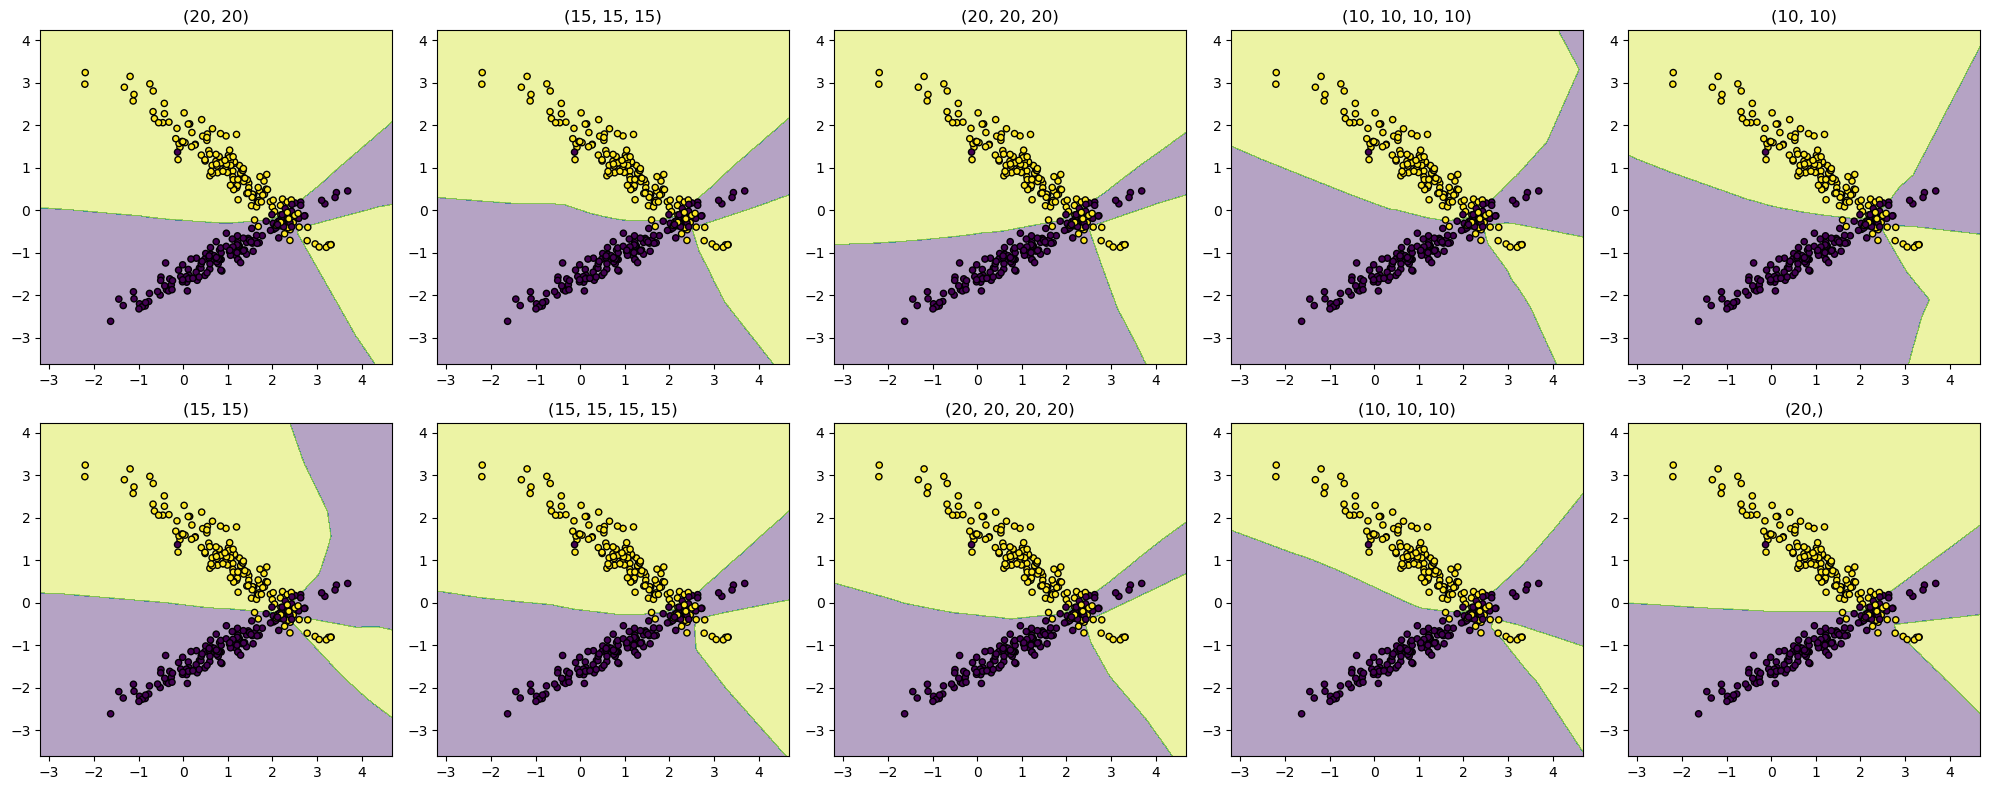

In [31]:
# Ejercicio 31
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Función para visualizar las decisiones del clasificador
def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    ax.set_title(title)


# Generar un conjunto de datos sintético para clasificación
X, y = make_classification(
    n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Probar diferentes combinaciones de capas ocultas y neuronas
configurations = []
for num_layers in range(1, 5):  # De 1 a 4 capas ocultas
    for neurons in range(5, 21, 5):  # Neuronas por capa: 5, 10, 15, 20
        hidden_layer_sizes = tuple([neurons] * num_layers)
        mlp = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes, random_state=42, max_iter=2000
        )
        mlp.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, mlp.predict(X_test))
        configurations.append((hidden_layer_sizes, accuracy))

    # Clasificar y seleccionar los 10 mejores
top_10 = sorted(configurations, key=lambda x: x[1], reverse=True)[:10]

# Visualizar los 10 mejores resultados
print("Top 10 configuraciones:")
for i, (config, acc) in enumerate(top_10, 1):
    print(f"{i}. Capas y Neuronas: {config}, Precisión: {acc:.4f}")

# Visualizar límites de decisión de los mejores clasificadores
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for ax, (config, _) in zip(axs.ravel(), top_10):
    mlp = MLPClassifier(hidden_layer_sizes=config, random_state=42, max_iter=2000)
    mlp.fit(X_train, y_train)
    plot_decision_boundary(mlp, X_test, y_test, str(config), ax)
plt.tight_layout()
plt.show()

# FIN DEL CAPÍTULO